# Вступ

Вирази:
* `В=D*MO-min(D)*C`
* `S = SORT(MO*D+D+C).`

Виконання роботи поділено на дві частини відповідно до завдання.



# Виконання

In [1]:
!pip install loguru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import json
import sys
import time
from random import randint, uniform
from threading import Thread

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from loguru import logger

Імпорт необхідних бібліотек

In [3]:
np.random.seed(9313)

Встановлення зерна рандому



In [4]:
data_file_path = "data.json"
results_file_path = "results.json"
min_dimension = 100
max_dimension = 150

Ініціалізація глобальних констант

In [5]:
sns.set_style("whitegrid")

Встановлення стилю для графіків

In [6]:
vectors_B = []
vectors_S = []

Змінні, куди будуть записуватись результати обрахунків

In [7]:
logger.remove()
logger.add(
    sys.stderr,
    format="<red>[{level}]</red> Message : <green>{message}</green> @ {time}",
    colorize=True,
)
logger.add("logs.log")

2

Налаштування логера

In [8]:
with open(data_file_path, "w") as f:
    vectors_С = [list(np.random.rand(n)) for n in range(min_dimension, max_dimension)]
    vectors_D = [list(np.random.rand(n)) for n in range(min_dimension, max_dimension)]
    matrixes_MO = [
        np.random.rand(n, n).tolist() for n in range(min_dimension, max_dimension)
    ]
    json.dump(
        {"vectors_С": vectors_С, "vectors_D": vectors_D, "matrixes_MO": matrixes_MO}, f
    )

Генерація початкових даних та запис їх у файл

## Перша частина

In [9]:
def common_start(func, thread_num, vector_C, vector_D, matrix_MO):
    logger.info(f"Starting {thread_num} thread...")
    func(vector_C, vector_D, matrix_MO)
    logger.success(f"Finishing {thread_num} thread...")

In [10]:
def first_expression(C, D, MO):
    result = np.subtract(np.dot(D, MO), np.dot(np.min(D), C))
    print(result)
    vectors_B.append(result.tolist())

In [11]:
def second_expression(C, D, MO):
    matrix_with_vectors = np.vstack((np.dot(D, MO), D, MO))
    result = np.sort(np.sum(matrix_with_vectors, axis=0))
    print(result)
    vectors_S.append(result.tolist())

Функції для обрахунків виразів

In [21]:
xs1, xs2 = [], []
ys = []
with open("data.json", "r") as f:
    data = json.load(f)
    for index in range(max_dimension - min_dimension):
        start = time.time()
        tr = Thread(
            target=common_start,
            args=[
                first_expression,
                index + 1,
                data["vectors_С"][index],
                data["vectors_D"][index],
                data["matrixes_MO"][index],
            ],
        )
        tr.start()
        tr.join()
        end = time.time()
        seconds = end - start
        xs1.append(seconds)
        ys.append(index + min_dimension)
        logger.info(f"The time of {index + 1} thread was {seconds}")

    for index in range(max_dimension - min_dimension):
        start = time.time()
        tr = Thread(
            target=common_start,
            args=[
                second_expression,
                index + 1,
                data["vectors_С"][index],
                data["vectors_D"][index],
                data["matrixes_MO"][index],
            ],
        )
        tr.start()
        tr.join()
        end = time.time()
        seconds = end - start
        xs2.append(seconds)
        logger.info(f"The time of {index + 1} thread was {seconds}")

[INFO] Message : Starting 1 thread... @ 2023-02-26T18:02:54.577041+0000
[SUCCESS] Message : Finishing 1 thread... @ 2023-02-26T18:02:54.587414+0000
[INFO] Message : The time of 1 thread was 0.029348373413085938 @ 2023-02-26T18:02:54.594268+0000
[INFO] Message : Starting 2 thread... @ 2023-02-26T18:02:54.604280+0000
[SUCCESS] Message : Finishing 2 thread... @ 2023-02-26T18:02:54.608473+0000
[INFO] Message : The time of 2 thread was 0.01650238037109375 @ 2023-02-26T18:02:54.615738+0000
[INFO] Message : Starting 3 thread... @ 2023-02-26T18:02:54.620816+0000
[SUCCESS] Message : Finishing 3 thread... @ 2023-02-26T18:02:54.632624+0000
[INFO] Message : The time of 3 thread was 0.020982027053833008 @ 2023-02-26T18:02:54.637982+0000
[INFO] Message : Starting 4 thread... @ 2023-02-26T18:02:54.641852+0000
[SUCCESS] Message : Finishing 4 thread... @ 2023-02-26T18:02:54.648902+0000
[INFO] Message : The time of 4 thread was 0.01318359375 @ 2023-02-26T18:02:54.652762+0000
[INFO] Message : Starting 5 

[25.4695385  23.48744921 24.89739993 25.07247359 26.70560967 22.71533806
 26.53592004 25.74160671 27.65838522 25.37343552 26.79651554 26.88531105
 23.64460057 24.84864659 27.58734286 25.65117298 25.2281279  24.96241893
 27.78001572 24.91278533 29.45438005 26.53192023 27.09864107 24.68933014
 25.98451283 26.08751939 25.66334156 22.70296616 23.3201862  24.40192569
 27.02513808 24.98803927 26.6096764  24.70468387 24.40973918 25.13712585
 25.84486206 22.15233741 26.02661085 24.60157623 25.70938816 23.2883236
 24.78238038 27.82435311 23.6664241  23.84806272 26.88941576 28.83539301
 25.39137575 24.79228196 27.52742345 23.87606692 25.87407177 24.60588172
 26.47297246 26.03613713 27.90867079 27.22875325 24.93535154 24.35723563
 23.13927642 22.06218901 22.68092935 27.34152399 27.12227275 25.04724736
 27.37269966 25.52421877 24.82521244 24.32141948 26.76494834 25.5056996
 30.04141381 24.13882679 28.63173837 28.89802287 24.90215107 24.54273915
 25.57904465 23.43121455 21.95557164 23.69931993 25.1

[INFO] Message : Starting 13 thread... @ 2023-02-26T18:02:54.791934+0000
[SUCCESS] Message : Finishing 13 thread... @ 2023-02-26T18:02:54.803903+0000
[INFO] Message : The time of 13 thread was 0.018749237060546875 @ 2023-02-26T18:02:54.807179+0000
[INFO] Message : Starting 14 thread... @ 2023-02-26T18:02:54.812199+0000
[SUCCESS] Message : Finishing 14 thread... @ 2023-02-26T18:02:54.819237+0000
[INFO] Message : The time of 14 thread was 0.014473199844360352 @ 2023-02-26T18:02:54.823671+0000
[INFO] Message : Starting 15 thread... @ 2023-02-26T18:02:54.826806+0000
[SUCCESS] Message : Finishing 15 thread... @ 2023-02-26T18:02:54.835294+0000
[INFO] Message : The time of 15 thread was 0.019289731979370117 @ 2023-02-26T18:02:54.844234+0000
[INFO] Message : Starting 16 thread... @ 2023-02-26T18:02:54.849097+0000
[SUCCESS] Message : Finishing 16 thread... @ 2023-02-26T18:02:54.858183+0000
[INFO] Message : The time of 16 thread was 0.016039371490478516 @ 2023-02-26T18:02:54.862014+0000
[INFO] M

[25.97872646 25.73054162 28.94998935 27.4314679  25.72504404 27.19333933
 26.66308156 29.47923419 29.46198739 27.7129325  26.17971032 25.24000022
 27.14090036 25.90317869 25.76195205 27.14765564 28.4091339  29.00908311
 27.90514347 24.60057125 28.93836103 29.40859972 24.19117379 27.15543648
 28.81001539 28.58106035 25.0220473  24.08590815 27.4941662  27.92490396
 29.34287028 26.91951447 23.7235184  25.86097679 29.27128317 27.00315211
 27.22800323 24.41174588 27.2526064  28.18255449 23.83600007 28.8187966
 26.25128504 26.83079728 29.27990216 29.04526297 27.39666967 26.07873722
 28.49714776 25.32777649 28.38683422 25.33462569 26.50421025 29.48235497
 29.45293422 27.62807123 25.10913547 26.6791211  27.12844939 29.91944431
 26.68739162 26.33773948 26.95939524 26.44517614 29.68272766 26.11507948
 27.27277231 27.43952511 24.0320379  26.98133468 24.88009639 29.23878014
 29.06808081 27.08381188 25.41815858 28.53127801 27.54595457 28.78455192
 27.41280926 27.16726707 27.00544851 30.13540545 25.

[INFO] Message : The time of 23 thread was 0.01796722412109375 @ 2023-02-26T18:02:55.008309+0000
[INFO] Message : Starting 24 thread... @ 2023-02-26T18:02:55.011587+0000
[SUCCESS] Message : Finishing 24 thread... @ 2023-02-26T18:02:55.024895+0000
[INFO] Message : The time of 24 thread was 0.018004179000854492 @ 2023-02-26T18:02:55.027903+0000
[INFO] Message : Starting 25 thread... @ 2023-02-26T18:02:55.030705+0000
[SUCCESS] Message : Finishing 25 thread... @ 2023-02-26T18:02:55.038769+0000
[INFO] Message : The time of 25 thread was 0.012344837188720703 @ 2023-02-26T18:02:55.041525+0000
[INFO] Message : Starting 26 thread... @ 2023-02-26T18:02:55.044506+0000
[SUCCESS] Message : Finishing 26 thread... @ 2023-02-26T18:02:55.052556+0000
[INFO] Message : The time of 26 thread was 0.012502670288085938 @ 2023-02-26T18:02:55.055390+0000
[INFO] Message : Starting 27 thread... @ 2023-02-26T18:02:55.059854+0000
[SUCCESS] Message : Finishing 27 thread... @ 2023-02-26T18:02:55.076978+0000
[INFO] Me

[24.00305375 31.25440489 28.2607417  31.9391859  26.8800427  28.61895365
 28.22597384 30.21236021 27.86821565 30.57154449 31.73664987 27.8173845
 25.32136193 30.71841825 29.69158923 28.15915884 29.91621078 29.4053331
 27.99058324 31.12804281 29.66037224 33.21036786 26.34889019 29.97034358
 27.36118933 28.33416774 25.07457426 28.11622249 29.34962136 26.6735236
 26.39513154 25.97830826 27.37769247 26.986929   30.05674302 30.28390277
 30.5498285  30.12959662 28.50752171 31.77471993 28.08957424 29.08971151
 27.06695106 31.89719219 26.95072932 28.86780045 27.13168957 31.28794414
 28.86687587 30.2559843  31.64960658 31.37817329 26.38537933 30.31544775
 29.57400037 28.24487683 30.20352383 28.31477342 27.31333902 29.92544503
 27.99994821 28.04959865 27.85868951 28.19008935 28.22583137 29.19947869
 32.41075916 28.36613391 27.16696685 27.27746661 24.68504357 28.41281542
 27.8942443  25.67274315 28.78614447 30.16113559 29.34860455 27.89102435
 28.84607741 33.33380099 29.41837168 29.48602771 29.59

[INFO] Message : Starting 34 thread... @ 2023-02-26T18:02:55.230446+0000
[SUCCESS] Message : Finishing 34 thread... @ 2023-02-26T18:02:55.248470+0000
[INFO] Message : The time of 34 thread was 0.030155658721923828 @ 2023-02-26T18:02:55.253331+0000
[INFO] Message : Starting 35 thread... @ 2023-02-26T18:02:55.256327+0000
[SUCCESS] Message : Finishing 35 thread... @ 2023-02-26T18:02:55.270431+0000
[INFO] Message : The time of 35 thread was 0.017066240310668945 @ 2023-02-26T18:02:55.272945+0000
[INFO] Message : Starting 36 thread... @ 2023-02-26T18:02:55.275701+0000
[SUCCESS] Message : Finishing 36 thread... @ 2023-02-26T18:02:55.285830+0000
[INFO] Message : The time of 36 thread was 0.014440059661865234 @ 2023-02-26T18:02:55.288690+0000
[INFO] Message : Starting 37 thread... @ 2023-02-26T18:02:55.291536+0000
[SUCCESS] Message : Finishing 37 thread... @ 2023-02-26T18:02:55.300638+0000
[INFO] Message : The time of 37 thread was 0.013763904571533203 @ 2023-02-26T18:02:55.303834+0000
[INFO] M

[32.84910085 31.26768222 36.61471923 34.76722042 32.66632786 34.96899358
 32.48082638 33.7750003  28.98807922 32.22284554 30.90883144 30.27943001
 36.40314657 36.27171922 31.76992707 30.96967057 36.78570543 31.36640131
 32.76014868 30.70279493 33.30901808 32.5015728  35.94518848 29.04155573
 34.26445645 34.31405722 33.34492093 33.66897455 35.06950961 35.76636987
 36.14904161 35.6014449  34.1061588  34.64221529 31.52701701 35.42120236
 34.07395897 36.53483651 33.08180513 31.14926117 31.24830761 34.55729199
 29.0464604  29.39746308 33.82271192 35.99001339 34.03792127 33.79341203
 32.68763313 35.40291283 33.36845965 27.93166877 31.01159109 35.11149442
 33.56834671 32.56957081 35.90938043 32.52222014 36.88471083 31.4232369
 33.01663235 33.30032701 30.91414411 35.42660845 31.61338558 29.54630273
 33.64825053 33.63826023 31.71710473 34.66685777 34.490522   31.53115152
 29.38422694 33.13263478 33.05028976 30.15412728 35.9975948  28.61235563
 32.65016663 33.18677099 33.00624848 35.18498817 33.

[INFO] Message : Starting 45 thread... @ 2023-02-26T18:02:55.453124+0000
[SUCCESS] Message : Finishing 45 thread... @ 2023-02-26T18:02:55.465866+0000
[INFO] Message : The time of 45 thread was 0.01604437828063965 @ 2023-02-26T18:02:55.468693+0000
[INFO] Message : Starting 46 thread... @ 2023-02-26T18:02:55.472705+0000
[SUCCESS] Message : Finishing 46 thread... @ 2023-02-26T18:02:55.484034+0000
[INFO] Message : The time of 46 thread was 0.020040035247802734 @ 2023-02-26T18:02:55.490435+0000
[INFO] Message : Starting 47 thread... @ 2023-02-26T18:02:55.501861+0000
[SUCCESS] Message : Finishing 47 thread... @ 2023-02-26T18:02:55.519069+0000
[INFO] Message : The time of 47 thread was 0.0321197509765625 @ 2023-02-26T18:02:55.527265+0000
[INFO] Message : Starting 48 thread... @ 2023-02-26T18:02:55.533633+0000
[SUCCESS] Message : Finishing 48 thread... @ 2023-02-26T18:02:55.548918+0000
[INFO] Message : The time of 48 thread was 0.02031111717224121 @ 2023-02-26T18:02:55.550751+0000
[INFO] Messa

[37.9236157  40.63412322 35.79619316 38.05951018 37.70618891 34.2788007
 35.83268172 35.78087951 41.48606086 35.38226722 37.3534727  36.55744899
 37.61533879 39.12666387 38.10412285 40.18399205 37.509137   34.73104557
 39.80265615 41.42093791 37.76171901 36.98563207 38.18378212 34.40499885
 37.96753963 38.78004514 38.70244958 38.56574135 42.21598799 39.44331148
 36.15115822 39.5615633  39.49117531 36.93514303 33.83216336 37.42345148
 37.85578871 38.4005465  33.62039144 37.67103909 33.65432216 35.07296112
 36.32138211 35.04055115 37.2239133  35.41862131 37.57942703 38.76099039
 37.25070063 36.47741628 38.48811786 36.58984641 37.33686773 38.5518297
 35.48902817 35.90088619 34.83223655 38.48040203 37.63613552 37.06200606
 33.03487169 37.36668817 35.86126335 39.08455963 37.14273588 35.18788774
 38.58611927 39.94663716 35.59277636 38.62113664 38.40177181 34.84929089
 39.83284783 38.61918501 38.70171362 37.38083973 38.2268422  36.17871275
 35.96418617 35.70908834 36.31816771 38.69564338 37.6

[INFO] Message : The time of 3 thread was 0.021162748336791992 @ 2023-02-26T18:02:55.668811+0000
[INFO] Message : Starting 4 thread... @ 2023-02-26T18:02:55.678363+0000
[SUCCESS] Message : Finishing 4 thread... @ 2023-02-26T18:02:55.699787+0000
[INFO] Message : The time of 4 thread was 0.030300140380859375 @ 2023-02-26T18:02:55.703196+0000
[INFO] Message : Starting 5 thread... @ 2023-02-26T18:02:55.712908+0000
[SUCCESS] Message : Finishing 5 thread... @ 2023-02-26T18:02:55.727491+0000
[INFO] Message : The time of 5 thread was 0.024863004684448242 @ 2023-02-26T18:02:55.735342+0000
[INFO] Message : Starting 6 thread... @ 2023-02-26T18:02:55.737988+0000
[SUCCESS] Message : Finishing 6 thread... @ 2023-02-26T18:02:55.753910+0000
[INFO] Message : The time of 6 thread was 0.01883530616760254 @ 2023-02-26T18:02:55.756649+0000
[INFO] Message : Starting 7 thread... @ 2023-02-26T18:02:55.761894+0000
[SUCCESS] Message : Finishing 7 thread... @ 2023-02-26T18:02:55.772998+0000
[INFO] Message : The 

[64.36721417 65.0198087  66.90821501 68.24997275 68.96595803 69.1900966
 69.21335144 70.03260388 70.08231352 70.36164312 70.63092284 70.67996427
 70.75750044 71.03717427 71.07891448 71.29243236 71.30096704 71.41880588
 71.43543592 71.57449615 71.83574903 71.99036942 72.13487014 72.14945223
 72.15507474 72.16709611 72.25007985 72.46308282 72.49830723 72.51346049
 72.68589592 72.74980577 72.85281665 72.97657905 73.44243833 73.86430327
 73.87841787 74.12897358 74.16216267 74.20307838 74.25354199 74.25845376
 74.49318315 74.69145291 74.74746731 74.98413974 75.03479527 75.11795822
 75.38930845 75.52411382 75.52753013 75.54643541 75.71498493 75.74785408
 75.7677662  76.04059867 76.13884382 76.29707587 76.29909978 76.44109144
 76.45457299 76.66526486 76.66782022 76.80312369 76.87983322 76.98214062
 77.08050471 77.20042176 77.23166417 77.35146956 77.49496493 77.52118097
 77.82272601 78.08460771 78.38888744 78.39650634 78.46637149 78.47562563
 78.49545692 78.58778342 78.62910027 78.73352333 78.

[INFO] Message : Starting 12 thread... @ 2023-02-26T18:02:55.894601+0000
[SUCCESS] Message : Finishing 12 thread... @ 2023-02-26T18:02:55.910332+0000
[INFO] Message : The time of 12 thread was 0.021007061004638672 @ 2023-02-26T18:02:55.914295+0000
[INFO] Message : Starting 13 thread... @ 2023-02-26T18:02:55.917041+0000
[SUCCESS] Message : Finishing 13 thread... @ 2023-02-26T18:02:55.926996+0000
[INFO] Message : The time of 13 thread was 0.014482975006103516 @ 2023-02-26T18:02:55.930374+0000
[INFO] Message : Starting 14 thread... @ 2023-02-26T18:02:55.932962+0000
[SUCCESS] Message : Finishing 14 thread... @ 2023-02-26T18:02:55.942781+0000
[INFO] Message : The time of 14 thread was 0.014379262924194336 @ 2023-02-26T18:02:55.946003+0000
[INFO] Message : Starting 15 thread... @ 2023-02-26T18:02:55.948551+0000
[SUCCESS] Message : Finishing 15 thread... @ 2023-02-26T18:02:55.960491+0000
[INFO] Message : The time of 15 thread was 0.0162198543548584 @ 2023-02-26T18:02:55.963475+0000
[INFO] Mes

[74.59687892 75.04426315 75.50012578 75.69995746 75.89777122 75.95319487
 76.78314623 76.9737355  77.19230401 77.97052563 78.11107873 78.3667412
 78.60382804 78.67113642 78.68439397 79.09271556 79.1936491  79.23751222
 79.42632393 79.68837063 79.77720159 79.81183322 80.20967584 80.36243228
 80.39547152 80.62883276 80.81634737 80.88493879 80.92313914 81.45663783
 81.49958031 81.51000168 81.52592797 81.89974355 82.20038073 82.21820913
 82.32652977 82.35880453 82.45109428 82.58090067 82.71833458 82.75790008
 82.83277151 83.0299362  83.04316584 83.24260478 83.3837101  83.45870846
 83.53343116 83.64010889 83.678687   83.89125662 83.89328536 84.01661702
 84.02674165 84.17579488 84.18298887 84.26787417 84.51664431 84.63903192
 84.74957598 84.78796366 84.82486045 84.94769721 85.10343889 85.26695671
 85.28161227 85.3585448  85.37811199 85.43398878 85.47302632 85.803398
 85.80469245 85.8724657  86.03094503 86.13351792 86.16995999 86.39171155
 86.60455199 86.78639593 86.80207623 86.87226957 86.90

[SUCCESS] Message : Finishing 21 thread... @ 2023-02-26T18:02:56.124827+0000
[INFO] Message : The time of 21 thread was 0.025614500045776367 @ 2023-02-26T18:02:56.127976+0000
[INFO] Message : Starting 22 thread... @ 2023-02-26T18:02:56.132217+0000
[SUCCESS] Message : Finishing 22 thread... @ 2023-02-26T18:02:56.143238+0000
[INFO] Message : The time of 22 thread was 0.015756607055664062 @ 2023-02-26T18:02:56.146501+0000
[INFO] Message : Starting 23 thread... @ 2023-02-26T18:02:56.150266+0000
[SUCCESS] Message : Finishing 23 thread... @ 2023-02-26T18:02:56.160108+0000
[INFO] Message : The time of 23 thread was 0.015674114227294922 @ 2023-02-26T18:02:56.163560+0000
[INFO] Message : Starting 24 thread... @ 2023-02-26T18:02:56.167046+0000
[SUCCESS] Message : Finishing 24 thread... @ 2023-02-26T18:02:56.178164+0000
[INFO] Message : The time of 24 thread was 0.01568436622619629 @ 2023-02-26T18:02:56.180913+0000
[INFO] Message : Starting 25 thread... @ 2023-02-26T18:02:56.186192+0000
[SUCCESS]

[ 76.50931837  77.5037452   79.17886897  79.60089836  80.88331731
  82.19110588  82.19404921  82.23875705  82.91115089  83.30336772
  83.4838819   83.59655817  83.73265542  83.8611422   84.21708781
  84.43962453  84.46191854  84.57480371  84.66403527  85.06376631
  85.54616248  85.56437626  85.60884615  85.68962316  86.1700688
  86.33494427  86.38840521  86.40685656  86.80194254  86.88951756
  87.24381225  87.57602458  87.57753254  87.67248073  87.86311687
  87.89478516  87.97901196  88.16209496  88.27761934  88.3042413
  88.36553909  88.37054913  88.50093593  88.51066457  88.6434184
  88.67753853  88.67982894  88.70042443  88.74568038  88.78264815
  88.8326762   88.84473583  88.94754463  89.3865964   89.42987916
  89.43604507  89.46683096  89.65492902  89.8685773   89.92385411
  90.22742012  90.61571638  90.61691547  90.6449672   90.7319446
  90.88791662  90.91682142  91.16189517  91.24550775  91.36674695
  91.41137869  91.48700142  91.50907917  91.63929111  91.67411704
  91.68204419 

[INFO] Message : The time of 29 thread was 0.026865005493164062 @ 2023-02-26T18:02:56.328152+0000
[INFO] Message : Starting 30 thread... @ 2023-02-26T18:02:56.334482+0000
[SUCCESS] Message : Finishing 30 thread... @ 2023-02-26T18:02:56.354052+0000
[INFO] Message : The time of 30 thread was 0.027921199798583984 @ 2023-02-26T18:02:56.361209+0000
[INFO] Message : Starting 31 thread... @ 2023-02-26T18:02:56.366003+0000
[SUCCESS] Message : Finishing 31 thread... @ 2023-02-26T18:02:56.380851+0000
[INFO] Message : The time of 31 thread was 0.022934436798095703 @ 2023-02-26T18:02:56.386013+0000
[INFO] Message : Starting 32 thread... @ 2023-02-26T18:02:56.393613+0000
[SUCCESS] Message : Finishing 32 thread... @ 2023-02-26T18:02:56.410630+0000
[INFO] Message : The time of 32 thread was 0.02844691276550293 @ 2023-02-26T18:02:56.419388+0000
[INFO] Message : Starting 33 thread... @ 2023-02-26T18:02:56.424370+0000
[SUCCESS] Message : Finishing 33 thread... @ 2023-02-26T18:02:56.439964+0000
[INFO] Me

[ 86.18053661  87.78187417  87.84687878  87.89939232  89.07378447
  89.43066799  89.62436096  89.66304262  89.66654122  90.92568618
  91.18310234  91.31596229  91.47993955  92.10221007  92.1135461
  92.19226019  92.37693531  92.43518671  92.51532623  92.60893045
  92.82565501  92.95226651  93.28437868  93.34154205  93.36620939
  93.80516176  94.10994692  94.65199655  95.05593403  95.14869655
  95.43167827  95.52166277  95.583556    95.63092721  95.71679597
  95.73868924  95.78245655  95.86971708  95.88348779  95.91546002
  95.9301699   96.22718213  96.25241796  96.32182075  96.57112994
  96.60057193  96.61590836  96.72686604  96.88753267  96.9694025
  96.97463356  97.04608817  97.13964135  97.17957379  97.48969561
  97.51606415  97.60439423  97.6764942   97.81392588  97.85901427
  97.86064742  98.13855321  98.30045372  98.36308039  98.39174046
  98.44705596  98.4582394   98.68333652  98.79355866  98.83063724
  98.83860873  98.87102693  99.22044974  99.38229471  99.44136717
  99.9149912

[INFO] Message : Starting 38 thread... @ 2023-02-26T18:02:56.558967+0000
[SUCCESS] Message : Finishing 38 thread... @ 2023-02-26T18:02:56.577057+0000
[INFO] Message : The time of 38 thread was 0.03218340873718262 @ 2023-02-26T18:02:56.586706+0000
[INFO] Message : Starting 39 thread... @ 2023-02-26T18:02:56.593752+0000
[SUCCESS] Message : Finishing 39 thread... @ 2023-02-26T18:02:56.614047+0000
[INFO] Message : The time of 39 thread was 0.03121638298034668 @ 2023-02-26T18:02:56.620550+0000
[INFO] Message : Starting 40 thread... @ 2023-02-26T18:02:56.626991+0000
[SUCCESS] Message : Finishing 40 thread... @ 2023-02-26T18:02:56.652353+0000
[INFO] Message : The time of 40 thread was 0.03280973434448242 @ 2023-02-26T18:02:56.655329+0000
[INFO] Message : Starting 41 thread... @ 2023-02-26T18:02:56.658398+0000
[SUCCESS] Message : Finishing 41 thread... @ 2023-02-26T18:02:56.678119+0000
[INFO] Message : The time of 41 thread was 0.027864933013916016 @ 2023-02-26T18:02:56.685211+0000
[INFO] Mess

[ 92.83971158  93.685584    94.10981345  94.74864811  95.25814494
  95.94003832  96.32304181  96.43183177  96.67433741  96.7161477
  96.99256458  97.2069649   97.27167067  97.33667027  97.89279256
  98.08327276  98.22766469  98.36270484  98.49179817  99.38552428
  99.51108206  99.64505372  99.76270578  99.90858863  99.9295573
 100.19203425 100.3561237  100.38677544 100.47449804 100.56590198
 100.66620417 100.68320911 100.81495998 101.10723435 101.12736852
 101.20430198 101.20959197 101.23994022 101.241698   101.44672023
 101.58904236 102.16976244 102.1796298  102.18363566 102.19206926
 102.26281891 102.31328102 102.55278632 102.55403833 102.57146667
 102.7055386  102.70566142 103.12007706 103.14129014 103.15957675
 103.56013033 103.68849215 103.84650315 103.93742541 103.9486398
 103.95038105 104.02837566 104.10588351 104.32351913 104.49261973
 104.51024361 104.62829883 104.65193652 104.66980392 104.69170115
 104.7664068  104.81152945 104.98728094 104.99375675 105.05103954
 105.14883359

[SUCCESS] Message : Finishing 44 thread... @ 2023-02-26T18:02:56.791549+0000
[INFO] Message : The time of 44 thread was 0.036797285079956055 @ 2023-02-26T18:02:56.799651+0000
[INFO] Message : Starting 45 thread... @ 2023-02-26T18:02:56.804873+0000
[SUCCESS] Message : Finishing 45 thread... @ 2023-02-26T18:02:56.825931+0000
[INFO] Message : The time of 45 thread was 0.03069162368774414 @ 2023-02-26T18:02:56.833772+0000
[INFO] Message : Starting 46 thread... @ 2023-02-26T18:02:56.835188+0000
[SUCCESS] Message : Finishing 46 thread... @ 2023-02-26T18:02:56.856094+0000
[INFO] Message : The time of 46 thread was 0.022891998291015625 @ 2023-02-26T18:02:56.857932+0000
[INFO] Message : Starting 47 thread... @ 2023-02-26T18:02:56.870842+0000
[SUCCESS] Message : Finishing 47 thread... @ 2023-02-26T18:02:56.886532+0000
[INFO] Message : The time of 47 thread was 0.026609182357788086 @ 2023-02-26T18:02:56.892038+0000
[INFO] Message : Starting 48 thread... @ 2023-02-26T18:02:56.898561+0000
[SUCCESS]

[ 98.69884183 100.11082174 100.23705763 100.85065937 101.32938977
 101.33807548 101.4968474  102.36697129 102.38565235 102.509136
 102.64473278 102.89041061 102.93803633 103.32116924 103.74100813
 103.97230368 104.5335357  104.61551925 104.65651345 104.7138729
 104.78338771 104.98713666 104.99779034 105.01155313 105.0500415
 105.07236595 105.18207912 105.27456644 105.40271164 105.58846242
 105.71560579 105.8772738  106.04454681 106.30703846 106.44958605
 106.50532854 106.68302443 106.81885732 106.85827902 106.98177974
 107.13314755 107.33408183 107.58019571 107.69527012 107.70906419
 107.76732618 107.93847267 107.95270552 108.05212987 108.23413802
 108.25818569 108.36071577 108.64789642 108.65656122 108.75992094
 108.77223086 108.7768768  108.79056218 108.91075109 108.93515641
 108.95138111 109.04616106 109.08492413 109.10397688 109.12575743
 109.23631581 109.24478236 109.33862119 109.37745673 109.38816471
 109.38877438 109.40094502 109.4473083  109.47580056 109.82651565
 109.98147824 

[SUCCESS] Message : Finishing 50 thread... @ 2023-02-26T18:02:57.009854+0000
[INFO] Message : The time of 50 thread was 0.03802609443664551 @ 2023-02-26T18:02:57.015035+0000


[ 98.89355038 100.48449931 100.5084353  101.25097923 102.67929785
 104.23237372 104.77503501 104.82433702 104.88496403 105.48167382
 105.81157908 106.14201223 106.22302914 106.72652013 106.75112966
 106.93081    107.29545701 107.33842178 107.60740946 107.67507841
 107.6931246  107.94158221 108.02398488 108.13378911 108.18428197
 108.33007653 108.35041456 108.51898661 108.54582541 108.55830906
 108.63108299 108.63801363 108.64532851 108.84514948 108.91333009
 108.960325   109.01666565 109.07272088 109.07708201 109.16752328
 109.2901879  109.34861145 109.7655901  109.81771935 110.36385598
 110.44142424 110.8833321  111.0116394  111.03429037 111.15216246
 111.50744271 111.57560168 111.57948203 111.58637766 111.60986883
 111.65837411 111.80547475 111.82137622 111.87778924 111.96902629
 112.10798451 112.3385701  112.62033812 112.62137077 112.73161033
 112.88971056 112.91295447 113.1204978  113.15452226 113.25250688
 113.30895073 113.3144663  113.68834211 113.80286681 113.81912669
 113.82281

Виведення статусу роботи потоків, а також результати обрахунків

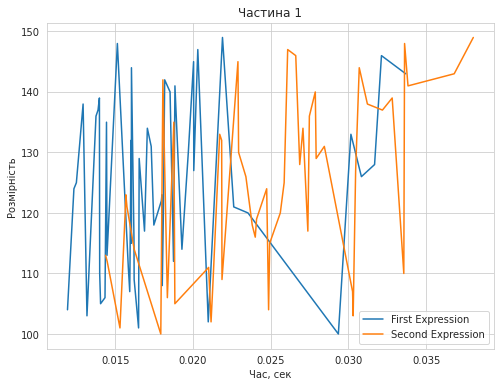

In [22]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=xs1, y=ys, label="First Expression")
sns.lineplot(x=xs2, y=ys, label="Second Expression")
plt.xlabel('Час, сек')
plt.ylabel('Розмірність')
plt.title("Частина 1")
plt.show()

Графік залежності часу виконання потоків від розмірності для обох виразів

In [14]:
with open(results_file_path, "w") as f:
    json.dump({"first_part": {"vectors_B": vectors_B, "vectors_S": vectors_S}}, f)

Запис результатів у файл

## Друга частина

In [15]:
vectors_B = []
vectors_S = []

In [16]:
class FirstExpressionThread:
    result_value, first_part, second_part, third_part = None, None, None, None

    def __init__(self, vector_c, vector_d, matrix_mo) -> None:
        self.vector_c = vector_c
        self.vector_d = vector_d
        self.matrix_mo = matrix_mo

    def first_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        self.first_part = np.min(self.vector_d)
        print(self.first_part)

        logger.success(f"Finishing {thread_num} thread...")

    def second_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        if self.first_part.all():
            self.second_part = np.dot(self.first_part, self.vector_c)
            print(self.second_part)

        logger.success(f"Finishing {thread_num} thread...")

    def third_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        self.third_part = np.dot(self.vector_d, self.matrix_mo)
        print(self.third_part)

        logger.success(f"Finishing {thread_num} thread...")

    def fourth_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        if self.third_part.all() and self.second_part.all():
            result = np.subtract(self.first_part, self.second_part)
            vectors_B.append(result.tolist())
            print(result)

        logger.success(f"Finishing {thread_num} thread...")

In [17]:
class SecondExpressionThread:
    result_value, first_part, second_part, third_part = None, None, None, None

    def __init__(self, vector_c, vector_d, matrix_mo) -> None:
        self.vector_c = vector_c
        self.vector_d = vector_d
        self.matrix_mo = matrix_mo

    def first_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        self.first_part = np.dot(self.vector_d, self.matrix_mo)
        print(self.first_part)

        logger.success(f"Finishing {thread_num} thread...")

    def second_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        if self.first_part.all():
            self.second_part = np.vstack(
                (self.first_part, self.vector_d, self.matrix_mo)
            )
            print(self.second_part)

        logger.success(f"Finishing {thread_num} thread...")

    def third_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        if self.second_part.all():
            self.third_part = np.sum(self.second_part, axis=0)
        print(self.third_part)

        logger.success(f"Finishing {thread_num} thread...")

    def fourth_part_thread(self, thread_num):
        logger.info(f"Starting {thread_num} thread...")

        if self.third_part.all():
            result = np.sort(self.third_part)
            vectors_S.append(result.tolist())
            print(result)

        logger.success(f"Finishing {thread_num} thread...")

Створення класів для обрахунку частини виразів в різних потоках

In [23]:
xs1, xs2 = [], []
ys = []
with open("data.json", "r") as f:
    data = json.load(f)
    for index in range(max_dimension - min_dimension):
        main_thread = FirstExpressionThread(
            data["vectors_С"][index],
            data["vectors_D"][index],
            data["matrixes_MO"][index],
        )
        start = time.time()
        tr1 = Thread(
            target=main_thread.first_part_thread,
            args=[f"{index+1}-1"],
        )
        tr2 = Thread(
            target=main_thread.second_part_thread,
            args=[f"{index+1}-2"],
        )
        tr3 = Thread(
            target=main_thread.third_part_thread,
            args=[f"{index+1}-3"],
        )
        tr4 = Thread(
            target=main_thread.fourth_part_thread,
            args=[f"{index+1}-4"],
        )
        tr1.start()
        tr1.join()
        tr2.start()
        tr2.join()
        tr3.start()
        tr3.join()
        tr4.start()
        tr4.join()
        end = time.time()
        seconds = end - start
        xs1.append(seconds)
        ys.append(index + min_dimension)
        logger.info(f"The time of {index + 1} thread was {seconds}")

    for index in range(max_dimension - min_dimension):
        main_thread = SecondExpressionThread(
            data["vectors_С"][index],
            data["vectors_D"][index],
            data["matrixes_MO"][index],
        )
        start = time.time()
        tr1 = Thread(
            target=main_thread.first_part_thread,
            args=[f"{index+1}-1"],
        )
        tr2 = Thread(
            target=main_thread.second_part_thread,
            args=[f"{index+1}-2"],
        )
        tr3 = Thread(
            target=main_thread.third_part_thread,
            args=[f"{index+1}-3"],
        )
        tr4 = Thread(
            target=main_thread.fourth_part_thread,
            args=[f"{index+1}-4"],
        )
        tr1.start()
        tr1.join()
        tr2.start()
        tr2.join()
        tr3.start()
        tr3.join()
        tr4.start()
        tr4.join()
        end = time.time()
        seconds = end - start
        xs2.append(seconds)
        logger.info(f"The time of {index + 1} thread was {seconds}")

[INFO] Message : Starting 1-1 thread... @ 2023-02-26T18:03:12.329336+0000
[SUCCESS] Message : Finishing 1-1 thread... @ 2023-02-26T18:03:12.332422+0000
[INFO] Message : Starting 1-2 thread... @ 2023-02-26T18:03:12.341180+0000
[SUCCESS] Message : Finishing 1-2 thread... @ 2023-02-26T18:03:12.347269+0000
[INFO] Message : Starting 1-3 thread... @ 2023-02-26T18:03:12.352832+0000
[SUCCESS] Message : Finishing 1-3 thread... @ 2023-02-26T18:03:12.360830+0000
[INFO] Message : Starting 1-4 thread... @ 2023-02-26T18:03:12.366950+0000
[SUCCESS] Message : Finishing 1-4 thread... @ 2023-02-26T18:03:12.373692+0000
[INFO] Message : The time of 1 thread was 0.04934358596801758 @ 2023-02-26T18:03:12.378459+0000
[INFO] Message : Starting 2-1 thread... @ 2023-02-26T18:03:12.383006+0000
[SUCCESS] Message : Finishing 2-1 thread... @ 2023-02-26T18:03:12.388125+0000
[INFO] Message : Starting 2-2 thread... @ 2023-02-26T18:03:12.394773+0000
[SUCCESS] Message : Finishing 2-2 thread... @ 2023-02-26T18:03:12.3981

0.0006996407995749632
[2.94822997e-04 1.80275093e-04 3.95752973e-04 5.51839044e-04
 1.09595851e-04 2.26060981e-04 8.97683917e-06 3.07283740e-04
 5.75432883e-04 5.30949621e-04 1.09656238e-04 5.64171833e-04
 3.51750517e-04 6.86134693e-04 6.81142767e-04 5.07987801e-04
 2.85074925e-04 3.84557132e-04 4.29971403e-04 3.85261138e-04
 5.29442176e-04 1.57565837e-04 4.20617300e-04 2.67842162e-04
 5.39143981e-04 3.77841379e-04 1.57324642e-04 3.03185991e-04
 2.02058266e-04 2.57825401e-04 2.59147784e-04 6.93126013e-04
 6.86602763e-04 5.38313255e-04 6.58705156e-04 5.57680954e-04
 3.99864718e-05 4.49731594e-04 5.85535499e-04 7.53163741e-05
 6.71962546e-05 2.10948874e-04 2.27568943e-04 6.58509326e-04
 2.07081799e-04 3.59600984e-04 5.91563412e-04 3.08227207e-04
 5.03610893e-04 4.40827466e-04 6.82371493e-05 7.76063262e-05
 6.04196934e-04 1.28692657e-04 6.35686861e-04 3.35006190e-04
 3.05061518e-04 4.45261534e-04 4.50714285e-04 4.54141270e-04
 3.64582609e-04 1.38172575e-04 2.27621161e-04 5.82508973e-04
 1

[INFO] Message : Starting 5-1 thread... @ 2023-02-26T18:03:12.546530+0000
[SUCCESS] Message : Finishing 5-1 thread... @ 2023-02-26T18:03:12.551060+0000
[INFO] Message : Starting 5-2 thread... @ 2023-02-26T18:03:12.558707+0000
[SUCCESS] Message : Finishing 5-2 thread... @ 2023-02-26T18:03:12.564977+0000
[INFO] Message : Starting 5-3 thread... @ 2023-02-26T18:03:12.569361+0000
[SUCCESS] Message : Finishing 5-3 thread... @ 2023-02-26T18:03:12.576614+0000
[INFO] Message : Starting 5-4 thread... @ 2023-02-26T18:03:12.579996+0000
[SUCCESS] Message : Finishing 5-4 thread... @ 2023-02-26T18:03:12.586473+0000
[INFO] Message : The time of 5 thread was 0.06370925903320312 @ 2023-02-26T18:03:12.590017+0000
[INFO] Message : Starting 6-1 thread... @ 2023-02-26T18:03:12.594866+0000
[SUCCESS] Message : Finishing 6-1 thread... @ 2023-02-26T18:03:12.600621+0000
[INFO] Message : Starting 6-2 thread... @ 2023-02-26T18:03:12.609893+0000
[SUCCESS] Message : Finishing 6-2 thread... @ 2023-02-26T18:03:12.6150

0.026556686333087165
[0.02105129 0.01395428 0.00375692 0.01976455 0.02620052 0.00176886
 0.02073937 0.0242864  0.00389959 0.01549401 0.02277591 0.00619707
 0.01439967 0.01415723 0.02150533 0.0089933  0.0091537  0.01988516
 0.01516342 0.0067343  0.02195744 0.01706144 0.00949365 0.0112262
 0.00269238 0.01227328 0.01540876 0.02104401 0.02219516 0.0137818
 0.00769069 0.00894123 0.01158433 0.01629661 0.01692975 0.02615684
 0.013826   0.01107701 0.00523458 0.01484648 0.02639872 0.02323927
 0.02158584 0.01516232 0.00934297 0.01678989 0.00902889 0.00443395
 0.00530731 0.00308309 0.00595017 0.02008915 0.02497749 0.01417391
 0.0101455  0.0184291  0.0174695  0.02065999 0.01410731 0.00565681
 0.00454696 0.00116293 0.02595007 0.01486667 0.01310463 0.02557483
 0.01648759 0.02549541 0.00232595 0.00866442 0.01004688 0.01285395
 0.0020824  0.00380738 0.0247949  0.01375148 0.01816681 0.01308618
 0.00429421 0.01572069 0.00942138 0.0189543  0.01860264 0.01048056
 0.02529802 0.02643748 0.02309027 0.0186936

[INFO] Message : The time of 8 thread was 0.048070669174194336 @ 2023-02-26T18:03:12.757746+0000
[INFO] Message : Starting 9-1 thread... @ 2023-02-26T18:03:12.759887+0000
[SUCCESS] Message : Finishing 9-1 thread... @ 2023-02-26T18:03:12.763459+0000
[INFO] Message : Starting 9-2 thread... @ 2023-02-26T18:03:12.773502+0000
[SUCCESS] Message : Finishing 9-2 thread... @ 2023-02-26T18:03:12.778613+0000
[INFO] Message : Starting 9-3 thread... @ 2023-02-26T18:03:12.790791+0000
[SUCCESS] Message : Finishing 9-3 thread... @ 2023-02-26T18:03:12.798738+0000
[INFO] Message : Starting 9-4 thread... @ 2023-02-26T18:03:12.801192+0000
[SUCCESS] Message : Finishing 9-4 thread... @ 2023-02-26T18:03:12.804637+0000
[INFO] Message : The time of 9 thread was 0.04812026023864746 @ 2023-02-26T18:03:12.807561+0000
[INFO] Message : Starting 10-1 thread... @ 2023-02-26T18:03:12.818419+0000
[SUCCESS] Message : Finishing 10-1 thread... @ 2023-02-26T18:03:12.822156+0000
[INFO] Message : Starting 10-2 thread... @ 20

0.008734168061933278
[1.57826410e-03 2.40074673e-03 5.77290897e-03 1.98898939e-03
 1.60765114e-03 6.09683796e-04 7.52102626e-03 2.35002607e-04
 5.46848708e-04 5.73348539e-03 2.48091956e-03 6.62967427e-03
 4.52280525e-03 5.76854942e-03 4.90354697e-03 8.28493240e-03
 4.49115848e-03 3.11954880e-03 4.14854789e-03 2.39525144e-03
 2.48041267e-03 6.73316541e-04 7.06249025e-03 5.68577858e-03
 9.48914352e-04 7.42300763e-03 7.99532209e-03 3.31275182e-05
 7.47027705e-03 8.03215057e-03 3.08642029e-03 3.94387024e-03
 1.14720198e-03 8.66139808e-03 7.02425156e-03 1.28048068e-03
 5.33601172e-03 2.27954267e-03 7.92386251e-03 7.97989456e-03
 2.33685159e-03 3.61963997e-03 6.68294319e-03 6.30399980e-04
 6.39774992e-03 8.67677503e-03 8.08311359e-03 6.43066254e-03
 4.62634595e-03 7.62405961e-03 8.29251599e-03 1.18258631e-03
 6.96334049e-04 3.21617992e-03 2.00211503e-03 9.60365306e-04
 4.22349453e-03 3.82538833e-03 7.34377194e-03 2.92937445e-03
 8.37004905e-03 7.24237204e-03 3.57196182e-03 4.86589501e-03
 7.

[INFO] Message : Starting 12-3 thread... @ 2023-02-26T18:03:12.978607+0000
[SUCCESS] Message : Finishing 12-3 thread... @ 2023-02-26T18:03:12.989982+0000
[INFO] Message : Starting 12-4 thread... @ 2023-02-26T18:03:12.999003+0000
[SUCCESS] Message : Finishing 12-4 thread... @ 2023-02-26T18:03:13.009125+0000
[INFO] Message : The time of 12 thread was 0.0709218978881836 @ 2023-02-26T18:03:13.016751+0000
[INFO] Message : Starting 13-1 thread... @ 2023-02-26T18:03:13.024547+0000
[SUCCESS] Message : Finishing 13-1 thread... @ 2023-02-26T18:03:13.032078+0000
[INFO] Message : Starting 13-2 thread... @ 2023-02-26T18:03:13.036051+0000
[SUCCESS] Message : Finishing 13-2 thread... @ 2023-02-26T18:03:13.042545+0000
[INFO] Message : Starting 13-3 thread... @ 2023-02-26T18:03:13.051574+0000
[SUCCESS] Message : Finishing 13-3 thread... @ 2023-02-26T18:03:13.058238+0000
[INFO] Message : Starting 13-4 thread... @ 2023-02-26T18:03:13.070261+0000
[SUCCESS] Message : Finishing 13-4 thread... @ 2023-02-26T1

[29.36774815 30.73471864 29.22850755 26.9975178  28.42010774 27.17795414
 26.90973555 26.86992994 27.60016885 25.58444106 31.09632708 30.83292642
 27.87872216 26.70767275 25.66681737 26.47834927 25.5059457  26.32498773
 28.79314599 27.67391785 28.48914182 27.83322224 29.39807106 30.00416602
 26.25430918 26.7885052  28.22837859 29.07880622 27.51339306 26.23912243
 26.89630341 28.15724341 31.55628328 29.03572208 25.85806707 28.06706779
 28.11484158 30.36345268 25.26233267 31.04427883 26.68966705 30.21237532
 27.9830464  27.57267991 25.86855777 26.19218924 28.35447649 29.96862544
 30.21238653 29.89048384 28.6377058  26.58992449 29.52640514 29.10824773
 28.87754369 27.7710975  30.0885714  25.5175086  29.70846517 26.9765441
 29.16129295 24.90242903 28.8374709  27.24105371 28.21508019 29.27278195
 29.17971094 28.5955878  28.08288    29.54124888 28.59632088 26.19768481
 29.8653375  28.43586096 25.56629395 28.53994754 24.8865263  28.97662563
 27.20138242 30.27139815 26.49615761 27.3858664  29.

[INFO] Message : Starting 15-2 thread... @ 2023-02-26T18:03:13.194025+0000
[SUCCESS] Message : Finishing 15-2 thread... @ 2023-02-26T18:03:13.209317+0000
[INFO] Message : Starting 15-3 thread... @ 2023-02-26T18:03:13.214750+0000
[SUCCESS] Message : Finishing 15-3 thread... @ 2023-02-26T18:03:13.228254+0000
[INFO] Message : Starting 15-4 thread... @ 2023-02-26T18:03:13.236350+0000
[SUCCESS] Message : Finishing 15-4 thread... @ 2023-02-26T18:03:13.241999+0000
[INFO] Message : The time of 15 thread was 0.07682967185974121 @ 2023-02-26T18:03:13.250119+0000
[INFO] Message : Starting 16-1 thread... @ 2023-02-26T18:03:13.254951+0000
[SUCCESS] Message : Finishing 16-1 thread... @ 2023-02-26T18:03:13.260278+0000
[INFO] Message : Starting 16-2 thread... @ 2023-02-26T18:03:13.264943+0000
[SUCCESS] Message : Finishing 16-2 thread... @ 2023-02-26T18:03:13.268693+0000
[INFO] Message : Starting 16-3 thread... @ 2023-02-26T18:03:13.276094+0000
[SUCCESS] Message : Finishing 16-3 thread... @ 2023-02-26T

[7.39973778e-03 1.01543806e-03 7.91197686e-03 4.20470245e-03
 7.71636487e-03 4.90512545e-03 3.35288352e-04 7.81115658e-03
 5.64318790e-03 7.76026454e-03 6.83649296e-03 1.49318243e-03
 3.15118600e-03 5.14707433e-03 8.17179087e-03 2.37592470e-04
 8.54742544e-04 6.22483177e-03 2.48795915e-03 4.12573648e-03
 9.95023670e-05 3.92129711e-03 8.06166997e-03 3.87558674e-03
 2.09094585e-03 7.70096929e-03 4.63530242e-03 3.67427247e-04
 7.40894725e-03 7.08712408e-03 4.83507042e-03 8.11789976e-04
 7.20039129e-03 1.68176420e-03 4.38622582e-03 5.84092921e-03
 4.67032298e-03 5.59519928e-03 1.51168169e-03 3.37982494e-03
 1.69662432e-03 6.55931356e-03 2.19702621e-03 6.41375972e-03
 4.93968832e-03 7.75061894e-03 1.06691951e-03 2.46981832e-03
 3.12176379e-03 1.06863871e-03 4.68728999e-03 6.89804696e-03
 7.71109440e-03 3.67165312e-03 1.04514107e-03 1.70105113e-03
 5.32984423e-03 2.90766833e-03 3.20492067e-03 4.96803251e-03
 6.78984498e-03 3.73360913e-03 4.39040643e-03 7.70526505e-03
 1.49768829e-03 8.105269

[INFO] Message : Starting 19-1 thread... @ 2023-02-26T18:03:13.413875+0000
[SUCCESS] Message : Finishing 19-1 thread... @ 2023-02-26T18:03:13.416963+0000
[INFO] Message : Starting 19-2 thread... @ 2023-02-26T18:03:13.421549+0000
[SUCCESS] Message : Finishing 19-2 thread... @ 2023-02-26T18:03:13.424250+0000
[INFO] Message : Starting 19-3 thread... @ 2023-02-26T18:03:13.429229+0000
[SUCCESS] Message : Finishing 19-3 thread... @ 2023-02-26T18:03:13.446030+0000
[INFO] Message : Starting 19-4 thread... @ 2023-02-26T18:03:13.452467+0000
[SUCCESS] Message : Finishing 19-4 thread... @ 2023-02-26T18:03:13.457088+0000
[INFO] Message : The time of 19 thread was 0.05288195610046387 @ 2023-02-26T18:03:13.462945+0000
[INFO] Message : Starting 20-1 thread... @ 2023-02-26T18:03:13.466918+0000
[SUCCESS] Message : Finishing 20-1 thread... @ 2023-02-26T18:03:13.472728+0000
[INFO] Message : Starting 20-2 thread... @ 2023-02-26T18:03:13.488234+0000
[SUCCESS] Message : Finishing 20-2 thread... @ 2023-02-26T

0.017303968636095513
[6.20614458e-03 1.64786635e-02 1.41137617e-02 2.07391980e-03
 1.54390180e-02 9.29294662e-03 1.12769150e-02 1.43852501e-02
 1.06724626e-02 1.13513603e-02 5.09633083e-03 8.02330091e-03
 1.63241325e-02 1.56300782e-02 1.60081632e-02 1.70817090e-02
 9.59873631e-03 1.39171397e-02 1.48364936e-02 1.29932166e-02
 9.89187375e-03 1.67550841e-02 1.58515278e-02 4.77077079e-03
 1.85338868e-03 1.02831572e-02 4.97618356e-03 1.46233180e-02
 7.58933933e-03 3.83829135e-03 1.55786482e-02 1.63859980e-02
 1.05702422e-02 1.24660474e-02 1.37736117e-02 1.06568221e-02
 5.64891973e-03 2.95193536e-03 1.61510761e-02 1.28412460e-02
 5.77630613e-03 1.68869150e-02 7.15392966e-03 8.47156478e-03
 1.58906909e-02 1.57564234e-02 1.37602494e-02 3.71414110e-04
 1.14574298e-02 4.48534285e-03 1.18017429e-02 6.58575527e-03
 1.42983087e-02 7.46491933e-03 8.69406224e-03 1.23993340e-02
 1.45843402e-02 1.60582593e-02 1.05134090e-02 1.62243466e-02
 1.27250211e-02 1.25522521e-02 8.57193949e-03 7.65366713e-06
 9.

[INFO] Message : Starting 22-2 thread... @ 2023-02-26T18:03:13.618628+0000
[SUCCESS] Message : Finishing 22-2 thread... @ 2023-02-26T18:03:13.634916+0000
[INFO] Message : Starting 22-3 thread... @ 2023-02-26T18:03:13.640933+0000
[SUCCESS] Message : Finishing 22-3 thread... @ 2023-02-26T18:03:13.649908+0000
[INFO] Message : Starting 22-4 thread... @ 2023-02-26T18:03:13.661422+0000
[SUCCESS] Message : Finishing 22-4 thread... @ 2023-02-26T18:03:13.668189+0000
[INFO] Message : The time of 22 thread was 0.07164597511291504 @ 2023-02-26T18:03:13.674572+0000
[INFO] Message : Starting 23-1 thread... @ 2023-02-26T18:03:13.685180+0000
[SUCCESS] Message : Finishing 23-1 thread... @ 2023-02-26T18:03:13.690562+0000
[INFO] Message : Starting 23-2 thread... @ 2023-02-26T18:03:13.701131+0000
[SUCCESS] Message : Finishing 23-2 thread... @ 2023-02-26T18:03:13.708960+0000
[INFO] Message : Starting 23-3 thread... @ 2023-02-26T18:03:13.713372+0000
[SUCCESS] Message : Finishing 23-3 thread... @ 2023-02-26T

[1.00309614e-02 5.22419813e-03 1.20524163e-02 1.86201855e-03
 1.39256470e-03 6.16763103e-03 1.64608979e-02 7.68740631e-03
 1.24897950e-02 2.19809299e-02 1.96507930e-03 9.15731622e-03
 1.96901792e-02 1.35381785e-02 2.82108943e-03 8.31509762e-03
 1.79148657e-02 1.84507135e-02 6.06998116e-03 1.97478164e-03
 2.11639556e-02 1.30130555e-02 3.96843665e-03 9.58537270e-03
 1.62421190e-02 9.50055773e-03 2.01054520e-02 1.86298780e-02
 1.98687824e-02 1.89658719e-03 1.17684070e-02 9.13354839e-03
 5.46979838e-03 1.79233232e-02 1.50081938e-02 1.39879868e-02
 6.54556900e-03 1.91468882e-02 1.51082353e-02 1.04381838e-02
 9.02040190e-04 1.91273044e-03 1.75317981e-02 1.64325112e-02
 1.40765451e-02 1.17144411e-02 7.74197493e-03 2.01487577e-02
 6.60350990e-03 1.40698000e-03 2.01547635e-02 1.64359502e-02
 1.86129092e-02 9.65061246e-03 1.65631637e-02 2.23094789e-02
 5.26051235e-03 2.27032145e-02 3.58177637e-03 1.13643509e-02
 9.39992685e-03 2.10078948e-02 5.03618552e-03 1.25495757e-02
 2.41508917e-03 1.256647

[INFO] Message : Starting 25-3 thread... @ 2023-02-26T18:03:13.834883+0000
[SUCCESS] Message : Finishing 25-3 thread... @ 2023-02-26T18:03:13.844764+0000
[INFO] Message : Starting 25-4 thread... @ 2023-02-26T18:03:13.848477+0000
[SUCCESS] Message : Finishing 25-4 thread... @ 2023-02-26T18:03:13.856010+0000
[INFO] Message : The time of 25 thread was 0.05910348892211914 @ 2023-02-26T18:03:13.861810+0000
[INFO] Message : Starting 26-1 thread... @ 2023-02-26T18:03:13.866278+0000
[SUCCESS] Message : Finishing 26-1 thread... @ 2023-02-26T18:03:13.869486+0000
[INFO] Message : Starting 26-2 thread... @ 2023-02-26T18:03:13.884587+0000
[SUCCESS] Message : Finishing 26-2 thread... @ 2023-02-26T18:03:13.897304+0000
[INFO] Message : Starting 26-3 thread... @ 2023-02-26T18:03:13.901368+0000
[SUCCESS] Message : Finishing 26-3 thread... @ 2023-02-26T18:03:13.917297+0000
[INFO] Message : Starting 26-4 thread... @ 2023-02-26T18:03:13.927938+0000
[SUCCESS] Message : Finishing 26-4 thread... @ 2023-02-26T

[29.6220973  29.04833755 27.54607981 29.16492103 28.00263285 27.80588416
 28.13927207 30.13892603 30.65624835 29.95055342 30.39993142 27.56678353
 28.81189387 26.76685856 28.1908822  27.32831671 28.35447339 30.63094061
 30.49856151 27.37682675 28.27523561 31.19490365 28.09027149 28.92587523
 32.0989534  29.54775366 29.66863426 29.2519544  29.07420583 28.37594534
 28.45248398 26.86485431 29.19177453 31.1956321  31.50639739 32.85176188
 32.96156896 30.00771689 27.43073314 28.75027411 28.96279997 27.33093282
 28.87051474 26.74669457 31.05028546 29.08642504 28.13395419 30.91615128
 27.22908044 30.09544257 27.7893612  26.12127621 29.05087486 26.3055528
 26.02894209 29.99954593 27.71217022 27.91453282 28.06660361 30.81853249
 28.26063222 26.22195389 31.04256439 27.81432281 29.43633562 27.71861956
 27.71902201 30.44976126 28.01130646 30.61941261 29.31342801 30.46917142
 27.46087    29.55757322 26.80049615 26.84843121 32.91900622 28.709002
 29.65732473 26.14432888 29.3723681  30.50256227 26.85

[INFO] Message : Starting 28-3 thread... @ 2023-02-26T18:03:14.051190+0000
[SUCCESS] Message : Finishing 28-3 thread... @ 2023-02-26T18:03:14.057863+0000
[INFO] Message : Starting 28-4 thread... @ 2023-02-26T18:03:14.068608+0000
[SUCCESS] Message : Finishing 28-4 thread... @ 2023-02-26T18:03:14.072890+0000
[INFO] Message : The time of 28 thread was 0.061830759048461914 @ 2023-02-26T18:03:14.080407+0000
[INFO] Message : Starting 29-1 thread... @ 2023-02-26T18:03:14.084992+0000
[SUCCESS] Message : Finishing 29-1 thread... @ 2023-02-26T18:03:14.090582+0000
[INFO] Message : Starting 29-2 thread... @ 2023-02-26T18:03:14.095621+0000
[SUCCESS] Message : Finishing 29-2 thread... @ 2023-02-26T18:03:14.101256+0000
[INFO] Message : Starting 29-3 thread... @ 2023-02-26T18:03:14.113560+0000
[SUCCESS] Message : Finishing 29-3 thread... @ 2023-02-26T18:03:14.131215+0000
[INFO] Message : Starting 29-4 thread... @ 2023-02-26T18:03:14.138921+0000
[SUCCESS] Message : Finishing 29-4 thread... @ 2023-02-26

[32.90396369 36.40847346 34.25063325 33.64455672 29.01147137 32.03073113
 35.94336618 34.74948533 35.70831    35.62503072 31.88933075 33.66044252
 33.54778692 35.51920187 33.50174686 29.73992018 34.95707318 33.79698459
 33.15834022 35.8102538  33.09567676 34.75862651 35.2560214  32.46467552
 33.91467783 35.41256406 31.40726407 34.45599424 32.34613226 34.52929415
 32.33054321 32.7094338  35.2662139  33.62083146 35.74735796 29.55497161
 36.02265074 32.45766978 32.09249917 31.64890531 35.24139035 34.3276164
 35.65331388 37.63431626 33.8341622  34.28255507 32.50836748 33.85301821
 35.09810569 31.48725519 36.5202595  32.80003375 33.60049237 29.71917305
 33.44265092 32.54096779 34.36370172 34.38165052 34.29557467 31.50133999
 36.57630408 31.53276892 35.5447219  36.47407762 33.6067653  34.32045016
 30.46006713 32.98195577 34.18903408 30.6732297  33.20843989 31.43692376
 34.13112291 32.55751703 30.90876885 36.19605869 31.42456535 31.89293791
 31.27132188 35.67536216 31.52436214 37.33476559 31.

[SUCCESS] Message : Finishing 31-3 thread... @ 2023-02-26T18:03:14.270679+0000
[INFO] Message : Starting 31-4 thread... @ 2023-02-26T18:03:14.278147+0000
[SUCCESS] Message : Finishing 31-4 thread... @ 2023-02-26T18:03:14.282830+0000
[INFO] Message : The time of 31 thread was 0.07360649108886719 @ 2023-02-26T18:03:14.289831+0000
[INFO] Message : Starting 32-1 thread... @ 2023-02-26T18:03:14.295213+0000
[SUCCESS] Message : Finishing 32-1 thread... @ 2023-02-26T18:03:14.299072+0000
[INFO] Message : Starting 32-2 thread... @ 2023-02-26T18:03:14.310629+0000
[SUCCESS] Message : Finishing 32-2 thread... @ 2023-02-26T18:03:14.317219+0000
[INFO] Message : Starting 32-3 thread... @ 2023-02-26T18:03:14.328702+0000
[SUCCESS] Message : Finishing 32-3 thread... @ 2023-02-26T18:03:14.341435+0000
[INFO] Message : Starting 32-4 thread... @ 2023-02-26T18:03:14.352072+0000
[SUCCESS] Message : Finishing 32-4 thread... @ 2023-02-26T18:03:14.360492+0000
[INFO] Message : The time of 32 thread was 0.072161436

[33.43749405 31.56818491 32.12223982 31.51692638 31.72149031 32.52172127
 32.05633353 27.61006879 33.26694679 32.61405071 30.25370788 33.96976626
 32.87468596 32.59793718 29.01615426 35.06317329 32.31186524 35.41146
 33.12609284 32.38369686 29.05720052 37.39661943 29.2889101  31.5611373
 32.11645946 33.39142923 33.73150694 30.82977791 31.42810913 30.50710532
 31.28828525 32.47744506 33.87058277 31.75047833 31.21305421 33.74223867
 31.40930461 34.63653018 29.50333067 35.16850619 33.11926945 35.05010672
 29.68137677 32.87428445 30.61320819 30.71883636 34.13541584 32.02906676
 29.83481949 33.90436314 31.50791469 32.78889355 30.98841714 37.85662942
 34.25093121 32.95556727 31.03083999 34.29371113 30.7677434  35.56728794
 34.50160478 35.69198388 29.67627612 32.67614091 30.23096886 33.8746538
 36.70502359 31.38565861 32.69034701 32.27802159 36.24678757 33.92694206
 31.38958137 30.86445053 37.17038167 32.10642916 34.08581339 31.4636494
 29.03057362 27.96356079 29.90420935 31.33345075 32.59948

[INFO] Message : Starting 34-3 thread... @ 2023-02-26T18:03:14.473467+0000
[SUCCESS] Message : Finishing 34-3 thread... @ 2023-02-26T18:03:14.491241+0000
[INFO] Message : Starting 34-4 thread... @ 2023-02-26T18:03:14.496871+0000
[SUCCESS] Message : Finishing 34-4 thread... @ 2023-02-26T18:03:14.504289+0000
[INFO] Message : The time of 34 thread was 0.06306624412536621 @ 2023-02-26T18:03:14.510108+0000
[INFO] Message : Starting 35-1 thread... @ 2023-02-26T18:03:14.515029+0000
[SUCCESS] Message : Finishing 35-1 thread... @ 2023-02-26T18:03:14.518170+0000
[INFO] Message : Starting 35-2 thread... @ 2023-02-26T18:03:14.538250+0000
[SUCCESS] Message : Finishing 35-2 thread... @ 2023-02-26T18:03:14.550671+0000
[INFO] Message : Starting 35-3 thread... @ 2023-02-26T18:03:14.559790+0000
[SUCCESS] Message : Finishing 35-3 thread... @ 2023-02-26T18:03:14.570483+0000
[INFO] Message : Starting 35-4 thread... @ 2023-02-26T18:03:14.579304+0000
[SUCCESS] Message : Finishing 35-4 thread... @ 2023-02-26T

[32.85170262 31.26867258 36.61702297 34.76783876 32.66750471 34.97218821
 32.48180866 33.77665116 28.99175409 32.22443286 30.91019349 30.28210101
 36.40508898 36.2719753  31.77206349 30.97259636 36.78772612 31.36779229
 32.76261793 30.70454812 33.30924948 32.50405979 35.94881614 29.04158934
 34.26632936 34.31545818 33.34739139 33.67013474 35.06968172 35.76711242
 36.15006138 35.60477417 34.10843485 34.64592634 31.52715063 35.42166666
 34.07590985 36.53491603 33.0834383  31.15144058 31.25142815 34.56028844
 29.05019242 29.40053937 33.8254535  35.99217928 34.04012368 33.79650604
 32.68890023 35.40593291 33.36966606 27.93482123 31.01186198 35.11299314
 33.57064906 32.57142196 35.9101492  32.52464426 36.88801662 31.42460306
 33.02034206 33.30042737 30.91685713 35.42730148 31.61572069 29.54930952
 33.65028576 33.63920772 31.72059233 34.66907329 34.49341481 31.53283592
 29.386827   33.13310504 33.05224712 30.15577502 36.00056247 28.61562228
 32.65139331 33.18995874 33.00892705 35.18769363 33

[SUCCESS] Message : Finishing 37-3 thread... @ 2023-02-26T18:03:14.704339+0000
[INFO] Message : Starting 37-4 thread... @ 2023-02-26T18:03:14.718383+0000
[SUCCESS] Message : Finishing 37-4 thread... @ 2023-02-26T18:03:14.722919+0000
[INFO] Message : The time of 37 thread was 0.05796384811401367 @ 2023-02-26T18:03:14.725378+0000
[INFO] Message : Starting 38-1 thread... @ 2023-02-26T18:03:14.735847+0000
[SUCCESS] Message : Finishing 38-1 thread... @ 2023-02-26T18:03:14.738307+0000
[INFO] Message : Starting 38-2 thread... @ 2023-02-26T18:03:14.749029+0000
[SUCCESS] Message : Finishing 38-2 thread... @ 2023-02-26T18:03:14.755064+0000
[INFO] Message : Starting 38-3 thread... @ 2023-02-26T18:03:14.771311+0000
[SUCCESS] Message : Finishing 38-3 thread... @ 2023-02-26T18:03:14.779826+0000
[INFO] Message : Starting 38-4 thread... @ 2023-02-26T18:03:14.783834+0000
[SUCCESS] Message : Finishing 38-4 thread... @ 2023-02-26T18:03:14.792415+0000
[INFO] Message : The time of 38 thread was 0.069372892

[34.08334345 33.35798713 37.51692888 31.03717205 34.27814212 31.61839758
 37.68377915 32.94323893 33.9061437  37.13506011 32.19379338 31.37419079
 32.53022841 35.31709554 34.32355133 35.25157069 33.96145408 34.57861967
 38.38055575 35.22207746 38.14317169 37.40357809 34.04177824 35.79662193
 32.93556589 34.0450456  35.17573857 37.11615602 32.70654581 33.63136628
 32.64899813 35.94895975 34.13708828 35.9597936  33.46777399 32.90354541
 32.1897871  34.57541248 39.50280811 35.61591039 36.22211316 31.88205262
 34.26618836 33.61171013 35.52738493 31.82918011 32.57296669 34.53169249
 35.59100776 32.2549728  32.76468999 38.33579345 37.28661238 33.03455508
 34.49527982 36.24705255 33.84015158 36.12290545 33.90409986 31.39977861
 37.72998464 29.93427251 35.47202604 34.63937449 33.20899978 36.69438873
 36.08866756 35.50608663 34.73409492 34.31194485 36.50585611 37.52444371
 34.63453462 32.61431136 33.14756052 32.78309062 34.43781577 33.37115108
 35.16833543 35.07619294 30.48434131 37.76901027 37

[SUCCESS] Message : Finishing 40-1 thread... @ 2023-02-26T18:03:14.912723+0000
[INFO] Message : Starting 40-2 thread... @ 2023-02-26T18:03:14.922409+0000
[SUCCESS] Message : Finishing 40-2 thread... @ 2023-02-26T18:03:14.930767+0000
[INFO] Message : Starting 40-3 thread... @ 2023-02-26T18:03:14.941254+0000
[SUCCESS] Message : Finishing 40-3 thread... @ 2023-02-26T18:03:14.953040+0000
[INFO] Message : Starting 40-4 thread... @ 2023-02-26T18:03:14.959399+0000
[SUCCESS] Message : Finishing 40-4 thread... @ 2023-02-26T18:03:14.969453+0000
[INFO] Message : The time of 40 thread was 0.08329391479492188 @ 2023-02-26T18:03:14.973364+0000
[INFO] Message : Starting 41-1 thread... @ 2023-02-26T18:03:14.977051+0000
[SUCCESS] Message : Finishing 41-1 thread... @ 2023-02-26T18:03:14.981355+0000
[INFO] Message : Starting 41-2 thread... @ 2023-02-26T18:03:14.986630+0000
[SUCCESS] Message : Finishing 41-2 thread... @ 2023-02-26T18:03:15.000343+0000
[INFO] Message : Starting 41-3 thread... @ 2023-02-26T

0.011314258810964706
[6.74790773e-03 1.83343525e-03 6.05666102e-03 6.54921541e-03
 7.50237860e-03 5.24301438e-03 1.10266922e-02 9.33230887e-03
 1.09504083e-03 3.08726453e-03 2.24391971e-03 8.79189597e-03
 1.05875377e-02 3.91277145e-03 1.41525959e-03 8.75730382e-03
 2.51183057e-03 6.26550370e-04 2.58866418e-03 3.09624695e-03
 1.01545665e-03 4.16627141e-04 2.50072659e-03 8.19984813e-03
 1.00158973e-02 3.28689114e-03 7.02485096e-03 7.31818134e-03
 2.41521000e-03 3.92249142e-03 3.07877469e-03 4.50041652e-03
 5.39979296e-03 3.73044442e-03 1.17795232e-03 8.95771477e-03
 5.16765922e-04 1.12459880e-02 1.01190585e-02 6.79890010e-03
 7.68051061e-03 4.22108465e-03 7.84560761e-03 6.31838151e-03
 4.31064201e-03 8.29862488e-03 1.06066521e-02 4.00208941e-04
 2.89404797e-03 8.02121132e-04 1.15877966e-03 4.94684621e-03
 1.36830608e-05 8.73864352e-03 5.20366093e-03 7.88885922e-03
 1.06032288e-02 6.82729229e-03 5.26145029e-03 8.18490435e-03
 2.52047402e-03 9.95199584e-03 4.73371873e-03 3.87106955e-03
 1.

[SUCCESS] Message : Finishing 43-1 thread... @ 2023-02-26T18:03:15.122382+0000
[INFO] Message : Starting 43-2 thread... @ 2023-02-26T18:03:15.127572+0000
[SUCCESS] Message : Finishing 43-2 thread... @ 2023-02-26T18:03:15.134221+0000
[INFO] Message : Starting 43-3 thread... @ 2023-02-26T18:03:15.153290+0000
[SUCCESS] Message : Finishing 43-3 thread... @ 2023-02-26T18:03:15.164728+0000
[INFO] Message : Starting 43-4 thread... @ 2023-02-26T18:03:15.170503+0000
[SUCCESS] Message : Finishing 43-4 thread... @ 2023-02-26T18:03:15.178993+0000
[INFO] Message : The time of 43 thread was 0.0687098503112793 @ 2023-02-26T18:03:15.185824+0000
[INFO] Message : Starting 44-1 thread... @ 2023-02-26T18:03:15.187306+0000
[SUCCESS] Message : Finishing 44-1 thread... @ 2023-02-26T18:03:15.189105+0000
[INFO] Message : Starting 44-2 thread... @ 2023-02-26T18:03:15.196630+0000
[SUCCESS] Message : Finishing 44-2 thread... @ 2023-02-26T18:03:15.204830+0000
[INFO] Message : Starting 44-3 thread... @ 2023-02-26T1

0.0008975116822234064
[1.40277532e-04 2.80934238e-05 8.15231729e-04 6.86803611e-04
 5.03315359e-04 5.24748618e-04 7.39725450e-05 8.13669986e-04
 5.93556315e-04 1.72742160e-04 3.08727794e-04 4.56466323e-04
 8.16795519e-04 8.64113331e-04 6.87945817e-04 3.84737727e-04
 6.60368471e-04 1.40643095e-04 8.43403144e-04 5.50002318e-04
 6.39996970e-05 2.91272474e-04 9.29765645e-05 5.64479194e-04
 2.24457727e-04 7.87320216e-04 8.83032380e-04 8.42017991e-04
 1.92198873e-06 6.93571027e-04 7.89901445e-04 2.85265630e-04
 3.76753209e-04 3.31954682e-04 2.94452288e-04 9.50142010e-05
 2.07044903e-04 6.13059876e-05 7.24093109e-04 8.40535819e-04
 6.18582062e-04 1.04788545e-04 8.52219690e-04 3.40481640e-04
 7.37124909e-04 3.90192976e-04 6.76789354e-04 8.64871312e-04
 8.66712965e-04 4.19072866e-04 7.61822273e-04 7.03530919e-05
 2.84722685e-04 2.87372734e-04 1.65373845e-05 1.52702750e-04
 3.04442281e-04 1.61459508e-04 1.14008998e-04 2.32654528e-04
 5.46981570e-05 2.67733567e-04 8.28656001e-04 5.91853190e-04
 5

[SUCCESS] Message : Finishing 46-3 thread... @ 2023-02-26T18:03:15.355243+0000
[INFO] Message : Starting 46-4 thread... @ 2023-02-26T18:03:15.361495+0000
[SUCCESS] Message : Finishing 46-4 thread... @ 2023-02-26T18:03:15.372294+0000
[INFO] Message : The time of 46 thread was 0.06392192840576172 @ 2023-02-26T18:03:15.375218+0000
[INFO] Message : Starting 47-1 thread... @ 2023-02-26T18:03:15.378969+0000
[SUCCESS] Message : Finishing 47-1 thread... @ 2023-02-26T18:03:15.383485+0000
[INFO] Message : Starting 47-2 thread... @ 2023-02-26T18:03:15.389596+0000
[SUCCESS] Message : Finishing 47-2 thread... @ 2023-02-26T18:03:15.395846+0000
[INFO] Message : Starting 47-3 thread... @ 2023-02-26T18:03:15.401056+0000
[SUCCESS] Message : Finishing 47-3 thread... @ 2023-02-26T18:03:15.420799+0000
[INFO] Message : Starting 47-4 thread... @ 2023-02-26T18:03:15.426219+0000
[SUCCESS] Message : Finishing 47-4 thread... @ 2023-02-26T18:03:15.434341+0000
[INFO] Message : The time of 47 thread was 0.062738656

[33.60225717 35.57294352 37.63761479 33.085817   38.11984594 36.04860463
 34.68427233 34.78357369 34.97784663 33.42437053 34.7820074  35.55334879
 28.99757202 37.86607945 36.93767589 35.8371005  36.3091502  34.44094099
 34.50783745 36.1389285  36.83325881 35.49469464 34.22402271 33.67044584
 32.38699575 32.63660657 32.4351621  34.91665765 33.08458174 34.67358627
 31.61132462 33.00423536 31.7716705  35.52438835 32.86584475 36.55184036
 33.39775071 35.40721871 35.28438704 36.21091938 32.05572031 36.65317149
 36.86862787 34.88743733 35.19912238 36.52027636 33.22458527 36.34384156
 37.78526105 37.39746935 36.86688016 31.84993417 30.46476827 31.80127434
 31.41978169 33.56392794 33.72438165 35.89365449 35.30787787 32.82255783
 35.78086076 35.76269536 33.91925897 36.31335573 37.35952522 33.18305348
 34.70711091 34.00371085 35.81951851 34.87161658 35.68442825 37.19246593
 33.75551801 36.45384649 36.42911274 34.02973665 34.05473841 34.95279992
 33.32197059 33.01829235 37.42925801 37.28324739 35

[INFO] Message : The time of 49 thread was 0.0637674331665039 @ 2023-02-26T18:03:15.564829+0000
[INFO] Message : Starting 50-1 thread... @ 2023-02-26T18:03:15.568221+0000
[SUCCESS] Message : Finishing 50-1 thread... @ 2023-02-26T18:03:15.570895+0000
[INFO] Message : Starting 50-2 thread... @ 2023-02-26T18:03:15.580016+0000
[SUCCESS] Message : Finishing 50-2 thread... @ 2023-02-26T18:03:15.584870+0000
[INFO] Message : Starting 50-3 thread... @ 2023-02-26T18:03:15.607611+0000
[SUCCESS] Message : Finishing 50-3 thread... @ 2023-02-26T18:03:15.621465+0000
[INFO] Message : Starting 50-4 thread... @ 2023-02-26T18:03:15.633134+0000
[SUCCESS] Message : Finishing 50-4 thread... @ 2023-02-26T18:03:15.641958+0000
[INFO] Message : The time of 50 thread was 0.07961583137512207 @ 2023-02-26T18:03:15.646680+0000
[INFO] Message : Starting 1-1 thread... @ 2023-02-26T18:03:15.651501+0000
[SUCCESS] Message : Finishing 1-1 thread... @ 2023-02-26T18:03:15.664488+0000
[INFO] Message : Starting 1-2 thread...

0.0026399442725152378
[1.80975951e-03 1.37739129e-03 2.14399696e-03 2.21536736e-03
 9.13298165e-04 5.07672496e-04 5.69079458e-04 1.98307776e-03
 7.50182400e-04 2.53378747e-03 2.55256803e-03 2.27135127e-03
 2.54572809e-03 1.71629485e-03 4.21867421e-04 7.36246176e-04
 2.43831493e-03 9.75892013e-04 5.84139052e-04 7.57286976e-04
 1.32134783e-03 4.49696519e-04 2.21271800e-03 2.26564374e-03
 1.14498781e-03 2.50180264e-03 2.41645074e-03 1.66855931e-03
 1.03276398e-03 7.16607549e-04 1.05090689e-03 2.17470760e-03
 9.28851347e-04 1.11033918e-03 9.77721036e-04 5.11927872e-04
 1.43484927e-04 2.31271657e-03 2.35749198e-03 1.92905305e-03
 4.23709727e-04 2.48436326e-03 2.25886320e-03 2.53635095e-03
 1.87020498e-03 1.36484358e-03 9.78222665e-04 7.05139865e-05
 3.31861309e-04 1.81279826e-03 4.09724020e-04 2.37635493e-04
 9.89202737e-04 2.36256389e-03 4.57154885e-04 1.13919288e-03
 1.09723186e-03 1.51395338e-03 8.14732238e-04 2.41076027e-03
 2.68286797e-04 8.02238148e-04 1.10588565e-03 1.14280309e-03
 8

[INFO] Message : The time of 2 thread was 0.06188607215881348 @ 2023-02-26T18:03:15.776213+0000
[INFO] Message : Starting 3-1 thread... @ 2023-02-26T18:03:15.792834+0000
[SUCCESS] Message : Finishing 3-1 thread... @ 2023-02-26T18:03:15.802519+0000
[INFO] Message : Starting 3-2 thread... @ 2023-02-26T18:03:15.806584+0000
[SUCCESS] Message : Finishing 3-2 thread... @ 2023-02-26T18:03:15.812045+0000
[INFO] Message : Starting 3-3 thread... @ 2023-02-26T18:03:15.823067+0000
[SUCCESS] Message : Finishing 3-3 thread... @ 2023-02-26T18:03:15.827971+0000
[INFO] Message : Starting 3-4 thread... @ 2023-02-26T18:03:15.837315+0000
[SUCCESS] Message : Finishing 3-4 thread... @ 2023-02-26T18:03:15.842292+0000
[INFO] Message : The time of 3 thread was 0.06401324272155762 @ 2023-02-26T18:03:15.846731+0000
[INFO] Message : Starting 4-1 thread... @ 2023-02-26T18:03:15.856276+0000
[SUCCESS] Message : Finishing 4-1 thread... @ 2023-02-26T18:03:15.866575+0000
[INFO] Message : Starting 4-2 thread... @ 2023-0

[23.81759295 24.63320187 25.53779997 22.2353314  24.31002512 23.51123547
 27.25754626 24.83765973 23.14898591 24.18286564 26.24571115 24.22925027
 25.46753936 21.79064786 26.76526242 23.12102413 24.65432529 24.04033358
 25.65693538 23.34066292 21.9582465  25.11999248 24.22034207 24.17581611
 25.19464556 27.66940631 26.0389026  27.72887192 22.65815286 26.16806391
 24.69949463 26.15112605 25.28227307 24.15857055 24.62628962 25.00746832
 27.16268041 26.00727233 25.3810897  27.67215417 24.87737297 21.03724809
 27.09176331 28.02299105 25.62526466 21.85545843 24.29626836 26.80198301
 22.78132634 26.92905612 25.52812041 23.64749382 22.55381992 24.621345
 26.20255068 25.19809295 25.4080545  24.68223133 26.92338218 23.18010745
 24.12134298 24.39692051 25.13881487 25.01439151 24.32332827 22.96453621
 24.44124562 24.88150281 26.14553465 27.15574504 24.43284754 22.56583242
 21.93671331 25.84344522 25.19939821 21.97131824 22.39370552 22.72302301
 23.32296601 26.3021086  22.37762785 26.72895594 24.9

[INFO] Message : The time of 5 thread was 0.08172249794006348 @ 2023-02-26T18:03:16.004533+0000
[INFO] Message : Starting 6-1 thread... @ 2023-02-26T18:03:16.015320+0000
[SUCCESS] Message : Finishing 6-1 thread... @ 2023-02-26T18:03:16.025415+0000
[INFO] Message : Starting 6-2 thread... @ 2023-02-26T18:03:16.031775+0000
[SUCCESS] Message : Finishing 6-2 thread... @ 2023-02-26T18:03:16.039453+0000
[INFO] Message : Starting 6-3 thread... @ 2023-02-26T18:03:16.046285+0000
[SUCCESS] Message : Finishing 6-3 thread... @ 2023-02-26T18:03:16.052749+0000
[INFO] Message : Starting 6-4 thread... @ 2023-02-26T18:03:16.070844+0000
[SUCCESS] Message : Finishing 6-4 thread... @ 2023-02-26T18:03:16.074141+0000
[INFO] Message : The time of 6 thread was 0.061571359634399414 @ 2023-02-26T18:03:16.075861+0000
[INFO] Message : Starting 7-1 thread... @ 2023-02-26T18:03:16.092266+0000
[SUCCESS] Message : Finishing 7-1 thread... @ 2023-02-26T18:03:16.100178+0000
[INFO] Message : Starting 7-2 thread... @ 2023-

[29.23968739 27.37902812 29.71863572 28.359363   29.49098578 28.57007002
 24.40181381 28.49283613 29.66526526 29.8687063  27.76783066 30.82248027
 28.30475912 28.80776719 28.78178464 27.95159802 34.37229652 27.66520768
 27.38865874 27.77825909 32.89891039 29.19054128 28.48452794 30.98904761
 31.56385351 29.37476414 27.92311136 29.66671237 26.66889673 26.49695455
 26.95197569 27.03184517 28.0331651  31.11012939 32.60219014 29.2492997
 26.56021521 26.52591504 29.07834241 26.82460391 28.88265751 29.42879244
 28.68085054 27.22024859 27.5747205  26.54762057 30.69605727 30.03236267
 27.12410094 28.56076768 30.7270101  33.59182953 26.37488394 28.60321557
 28.95731987 32.28357371 29.5639113  30.95990051 28.72203295 26.29865283
 31.15323145 28.3170542  27.98911535 26.02238485 33.43388329 28.56641761
 29.96167387 30.16374428 32.70489262 28.36323603 28.8315527  31.73890027
 31.94784696 26.82714658 27.96316988 29.01209687 31.53182935 31.05594509
 30.54929941 24.3388098  23.54347627 31.85607127 27.

[INFO] Message : Starting 9-2 thread... @ 2023-02-26T18:03:16.229994+0000
[SUCCESS] Message : Finishing 9-2 thread... @ 2023-02-26T18:03:16.236189+0000
[INFO] Message : Starting 9-3 thread... @ 2023-02-26T18:03:16.239178+0000
[SUCCESS] Message : Finishing 9-3 thread... @ 2023-02-26T18:03:16.244767+0000
[INFO] Message : Starting 9-4 thread... @ 2023-02-26T18:03:16.249301+0000
[SUCCESS] Message : Finishing 9-4 thread... @ 2023-02-26T18:03:16.258810+0000
[INFO] Message : The time of 9 thread was 0.04610109329223633 @ 2023-02-26T18:03:16.261322+0000
[INFO] Message : Starting 10-1 thread... @ 2023-02-26T18:03:16.263977+0000
[SUCCESS] Message : Finishing 10-1 thread... @ 2023-02-26T18:03:16.276902+0000
[INFO] Message : Starting 10-2 thread... @ 2023-02-26T18:03:16.279907+0000
[SUCCESS] Message : Finishing 10-2 thread... @ 2023-02-26T18:03:16.286499+0000
[INFO] Message : Starting 10-3 thread... @ 2023-02-26T18:03:16.294160+0000
[SUCCESS] Message : Finishing 10-3 thread... @ 2023-02-26T18:03:1

[[28.14649251 30.48668032 31.25907453 ... 29.22651112 29.29590226
  27.56353096]
 [ 0.99681556  0.56336263  0.64303848 ...  0.66333696  0.06117375
   0.43142057]
 [ 0.56171603  0.86977535  0.5153468  ...  0.21130667  0.09779867
   0.76881206]
 ...
 [ 0.29223056  0.39685491  0.52596977 ...  0.58779475  0.56682876
   0.0667116 ]
 [ 0.39739305  0.1592049   0.77811137 ...  0.77127149  0.50992359
   0.73195534]
 [ 0.41258907  0.92775341  0.44677401 ...  0.74920064  0.84449108
   0.25554884]]
[79.85134273 85.85305735 87.16052388 82.4394821  92.67924123 76.28077008
 86.1874592  86.6157987  84.15825534 90.48386958 80.2014072  86.17732702
 83.51266201 92.59951103 90.45761719 88.97144964 87.46495952 89.53006223
 84.27229227 84.1397018  86.7902555  84.84524098 83.76359336 84.57291789
 86.10102497 84.30337475 89.39294079 79.07537036 86.92303336 89.54807938
 90.38877395 87.06469756 75.58633835 84.17387483 79.49473211 82.57473761
 87.40564342 84.97298591 86.87585413 87.18459002 82.0981014  80.920580

[SUCCESS] Message : Finishing 13-1 thread... @ 2023-02-26T18:03:16.445637+0000
[INFO] Message : Starting 13-2 thread... @ 2023-02-26T18:03:16.454067+0000
[SUCCESS] Message : Finishing 13-2 thread... @ 2023-02-26T18:03:16.462139+0000
[INFO] Message : Starting 13-3 thread... @ 2023-02-26T18:03:16.471323+0000
[SUCCESS] Message : Finishing 13-3 thread... @ 2023-02-26T18:03:16.475034+0000
[INFO] Message : Starting 13-4 thread... @ 2023-02-26T18:03:16.486705+0000
[SUCCESS] Message : Finishing 13-4 thread... @ 2023-02-26T18:03:16.491163+0000
[INFO] Message : The time of 13 thread was 0.07195520401000977 @ 2023-02-26T18:03:16.498977+0000
[INFO] Message : Starting 14-1 thread... @ 2023-02-26T18:03:16.502899+0000
[SUCCESS] Message : Finishing 14-1 thread... @ 2023-02-26T18:03:16.518197+0000
[INFO] Message : Starting 14-2 thread... @ 2023-02-26T18:03:16.521353+0000
[SUCCESS] Message : Finishing 14-2 thread... @ 2023-02-26T18:03:16.527554+0000
[INFO] Message : Starting 14-3 thread... @ 2023-02-26T

[25.97935926 25.73058661 28.95022639 27.43237455 25.72513027 27.19406725
 26.66326511 29.47997421 29.4620569  27.71389226 26.18068738 25.24094971
 27.14104363 25.90392538 25.76265297 27.14801419 28.40994256 29.0093221
 27.90583205 24.60092773 28.93911135 29.40951778 24.19154254 27.15557449
 28.81055001 28.58166086 25.0228131  24.08692995 27.49503525 27.92557586
 29.34358892 26.92021686 23.72429183 25.86145593 29.27142877 27.00400596
 27.22816161 24.41204375 27.25298912 28.18308332 23.83641307 28.81957135
 26.25228537 26.83102215 29.28061274 29.04551977 27.3972915  26.07945665
 28.49735799 25.32799952 28.38758419 25.33562633 26.50472354 29.482911
 29.45375361 27.62809906 25.10917914 26.67965005 27.12936366 29.9198391
 26.6881955  26.3386448  26.95999511 26.44578454 29.68284718 26.11543409
 27.27304283 27.43979122 24.03224885 26.98150675 24.88018552 29.23960866
 29.0688058  27.08449651 25.41856026 28.53200727 27.54618601 28.78514837
 27.41370652 27.16816849 27.00569694 30.13614857 25.360

[INFO] Message : Starting 16-3 thread... @ 2023-02-26T18:03:16.661237+0000
[SUCCESS] Message : Finishing 16-3 thread... @ 2023-02-26T18:03:16.667257+0000
[INFO] Message : Starting 16-4 thread... @ 2023-02-26T18:03:16.673952+0000
[SUCCESS] Message : Finishing 16-4 thread... @ 2023-02-26T18:03:16.677483+0000
[INFO] Message : The time of 16 thread was 0.0542140007019043 @ 2023-02-26T18:03:16.679397+0000
[INFO] Message : Starting 17-1 thread... @ 2023-02-26T18:03:16.688508+0000
[SUCCESS] Message : Finishing 17-1 thread... @ 2023-02-26T18:03:16.698254+0000
[INFO] Message : Starting 17-2 thread... @ 2023-02-26T18:03:16.704032+0000
[SUCCESS] Message : Finishing 17-2 thread... @ 2023-02-26T18:03:16.714623+0000
[INFO] Message : Starting 17-3 thread... @ 2023-02-26T18:03:16.720292+0000
[SUCCESS] Message : Finishing 17-3 thread... @ 2023-02-26T18:03:16.725044+0000
[INFO] Message : Starting 17-4 thread... @ 2023-02-26T18:03:16.731091+0000
[SUCCESS] Message : Finishing 17-4 thread... @ 2023-02-26T1

[87.99162124 77.98487837 87.35257314 88.54490404 91.25965954 82.20894209
 92.79159718 83.28297581 86.20628828 95.61000925 95.63433807 89.38542406
 88.21930087 84.74320352 79.13281467 86.51987555 81.68361972 77.8950007
 94.10036659 84.5051191  87.81408686 83.24065432 82.73194622 80.90895502
 90.9753887  90.09111995 84.35586952 90.85471114 84.44489545 80.92326087
 93.31629275 89.81410793 83.56651603 92.44848226 77.89937605 85.32095384
 88.53313633 96.49197407 82.57552998 86.02753357 85.18663382 84.66265148
 82.39797649 83.91585084 82.5975961  85.27907527 85.4808419  82.34991318
 84.82256361 90.85561204 79.64463333 82.03628274 86.36583873 83.28028423
 90.6821276  86.45269301 87.60838316 89.11487258 83.5314569  78.79955091
 78.1693028  79.41012904 82.98454162 85.42759398 81.06348915 83.75968634
 90.6573712  85.57177075 89.35760439 84.7575993  88.51526293 83.33198984
 82.60658846 83.35061809 83.58098346 81.66537962 79.34112901 86.08997398
 84.53897157 81.60763961 85.76947882 86.77884881 85.

[SUCCESS] Message : Finishing 20-1 thread... @ 2023-02-26T18:03:16.877073+0000
[INFO] Message : Starting 20-2 thread... @ 2023-02-26T18:03:16.883190+0000
[SUCCESS] Message : Finishing 20-2 thread... @ 2023-02-26T18:03:16.891476+0000
[INFO] Message : Starting 20-3 thread... @ 2023-02-26T18:03:16.905182+0000
[SUCCESS] Message : Finishing 20-3 thread... @ 2023-02-26T18:03:16.909112+0000
[INFO] Message : Starting 20-4 thread... @ 2023-02-26T18:03:16.919167+0000
[SUCCESS] Message : Finishing 20-4 thread... @ 2023-02-26T18:03:16.926382+0000
[INFO] Message : The time of 20 thread was 0.07193493843078613 @ 2023-02-26T18:03:16.928512+0000
[INFO] Message : Starting 21-1 thread... @ 2023-02-26T18:03:16.936102+0000
[SUCCESS] Message : Finishing 21-1 thread... @ 2023-02-26T18:03:16.948553+0000
[INFO] Message : Starting 21-2 thread... @ 2023-02-26T18:03:16.952050+0000
[SUCCESS] Message : Finishing 21-2 thread... @ 2023-02-26T18:03:16.964700+0000
[INFO] Message : Starting 21-3 thread... @ 2023-02-26T

[28.74572503 29.22816533 31.57700665 31.20458149 30.58202027 29.68985571
 27.32696361 29.20926387 31.37823248 29.90862197 31.11767992 28.3222661
 27.55166299 27.77914933 31.20163058 29.76688347 26.34606098 29.50287174
 25.51424491 29.97612945 28.85045327 29.86484289 30.99064273 30.88486987
 29.26796611 28.59884517 28.7833781  31.20684411 29.66727232 31.86234132
 28.83533326 26.8327632  28.71772454 29.08667152 30.73183807 28.79059555
 32.70165827 31.06750405 28.67914109 31.70835411 32.8196334  31.38812995
 29.40784718 32.13819672 28.86232583 28.9171525  31.91257322 27.78979483
 27.41377981 30.84016441 31.47154217 29.64751779 29.22657873 30.84612869
 29.56670519 26.93553703 29.94780238 28.28777996 27.84260265 26.9869917
 30.09051367 33.48442498 27.07072744 28.67829565 28.51274645 32.87801028
 29.71295395 29.40899384 30.45842659 30.48782488 34.38445196 27.14604443
 31.25632265 29.56758028 29.13903719 28.86986565 31.66316001 28.32103601
 31.16524778 29.3238379  30.2685716  28.09884536 30.9

[SUCCESS] Message : Finishing 23-1 thread... @ 2023-02-26T18:03:17.086116+0000
[INFO] Message : Starting 23-2 thread... @ 2023-02-26T18:03:17.094627+0000
[SUCCESS] Message : Finishing 23-2 thread... @ 2023-02-26T18:03:17.099696+0000
[INFO] Message : Starting 23-3 thread... @ 2023-02-26T18:03:17.112801+0000
[SUCCESS] Message : Finishing 23-3 thread... @ 2023-02-26T18:03:17.119706+0000
[INFO] Message : Starting 23-4 thread... @ 2023-02-26T18:03:17.124784+0000
[SUCCESS] Message : Finishing 23-4 thread... @ 2023-02-26T18:03:17.128341+0000
[INFO] Message : The time of 23 thread was 0.07831287384033203 @ 2023-02-26T18:03:17.143856+0000
[INFO] Message : Starting 24-1 thread... @ 2023-02-26T18:03:17.147984+0000
[SUCCESS] Message : Finishing 24-1 thread... @ 2023-02-26T18:03:17.163238+0000
[INFO] Message : Starting 24-2 thread... @ 2023-02-26T18:03:17.171487+0000
[SUCCESS] Message : Finishing 24-2 thread... @ 2023-02-26T18:03:17.178798+0000
[INFO] Message : Starting 24-3 thread... @ 2023-02-26T

[28.97816192 28.03586876 28.44559867 29.64995739 30.0506402  30.1286999
 28.65107404 33.69456871 32.06285548 29.95534395 30.81326595 30.79127193
 29.59223951 31.31470125 28.2555169  30.13538705 29.51645034 29.26970409
 31.33524625 29.08495686 27.98203336 31.99550142 25.88077945 30.96531541
 28.12485581 30.71335275 28.08762045 28.30082411 31.50787058 27.00765445
 28.07589237 26.75693012 30.73380547 27.72211461 29.95803735 30.53440532
 29.27767776 31.3041556  28.43259278 31.08348677 30.05333563 30.06003857
 33.77082188 32.01877302 27.81881305 31.20527797 28.44601294 27.75938304
 27.74149691 29.89150648 28.99852428 29.6665033  26.36084934 30.94111137
 28.80904661 27.29064536 29.4402952  29.49381374 29.61129965 27.95237514
 32.06291361 27.0416298  30.97477908 30.60959757 30.79059601 31.22451634
 28.36677321 30.34194123 27.6572922  31.96113775 30.734222   32.23724307
 28.17025554 28.32055366 27.2531544  27.33541002 29.36013246 30.83858013
 32.99815149 27.93615175 29.92851391 27.49728009 29.

[SUCCESS] Message : Finishing 25-4 thread... @ 2023-02-26T18:03:17.290813+0000
[INFO] Message : The time of 25 thread was 0.07740092277526855 @ 2023-02-26T18:03:17.304169+0000
[INFO] Message : Starting 26-1 thread... @ 2023-02-26T18:03:17.310937+0000
[SUCCESS] Message : Finishing 26-1 thread... @ 2023-02-26T18:03:17.324180+0000
[INFO] Message : Starting 26-2 thread... @ 2023-02-26T18:03:17.331018+0000
[SUCCESS] Message : Finishing 26-2 thread... @ 2023-02-26T18:03:17.342739+0000
[INFO] Message : Starting 26-3 thread... @ 2023-02-26T18:03:17.348901+0000
[SUCCESS] Message : Finishing 26-3 thread... @ 2023-02-26T18:03:17.355964+0000
[INFO] Message : Starting 26-4 thread... @ 2023-02-26T18:03:17.369877+0000
[SUCCESS] Message : Finishing 26-4 thread... @ 2023-02-26T18:03:17.375727+0000
[INFO] Message : The time of 26 thread was 0.07565069198608398 @ 2023-02-26T18:03:17.382947+0000
[INFO] Message : Starting 27-1 thread... @ 2023-02-26T18:03:17.387131+0000
[SUCCESS] Message : Finishing 27-1 t

[ 77.41253665  81.27881704  81.39488749  82.11909221  82.38593266
  82.80312525  82.90342302  83.25151686  83.71827519  83.97037166
  84.33867033  85.05758509  85.53148759  85.60000111  85.63038538
  85.92393588  86.01385     86.08779351  86.11602123  86.62365315
  86.64165129  86.64948164  86.72994256  87.07524234  87.16628027
  87.18843282  87.6730146   87.79917591  87.87830767  87.98939411
  88.01902192  88.02462594  88.0444      88.28697841  88.37084403
  88.44927651  88.63964045  88.67135229  88.734709    88.77254734
  88.8244767   88.85264882  88.96427361  89.2560417   89.27832693
  89.36492298  89.37479403  89.38127749  89.41550822  89.59016283
  89.70334533  89.70892482  89.88857864  90.19342827  90.34573428
  90.35495422  90.5740966   90.92769016  91.12074103  91.15839312
  91.20042227  91.28484665  91.40551514  91.58136027  91.64769053
  91.65863178  91.81405896  91.90439673  91.91138721  91.97540213
  92.02012093  92.06820377  92.13017642  92.13927887  92.14021766
  92.36799

[INFO] Message : Starting 28-1 thread... @ 2023-02-26T18:03:17.504832+0000
[SUCCESS] Message : Finishing 28-1 thread... @ 2023-02-26T18:03:17.515841+0000
[INFO] Message : Starting 28-2 thread... @ 2023-02-26T18:03:17.523873+0000
[SUCCESS] Message : Finishing 28-2 thread... @ 2023-02-26T18:03:17.534499+0000
[INFO] Message : Starting 28-3 thread... @ 2023-02-26T18:03:17.537363+0000
[SUCCESS] Message : Finishing 28-3 thread... @ 2023-02-26T18:03:17.542997+0000
[INFO] Message : Starting 28-4 thread... @ 2023-02-26T18:03:17.549618+0000
[SUCCESS] Message : Finishing 28-4 thread... @ 2023-02-26T18:03:17.556655+0000
[INFO] Message : The time of 28 thread was 0.06689858436584473 @ 2023-02-26T18:03:17.563208+0000
[INFO] Message : Starting 29-1 thread... @ 2023-02-26T18:03:17.568128+0000
[SUCCESS] Message : Finishing 29-1 thread... @ 2023-02-26T18:03:17.581161+0000
[INFO] Message : Starting 29-2 thread... @ 2023-02-26T18:03:17.587176+0000
[SUCCESS] Message : Finishing 29-2 thread... @ 2023-02-26T

[32.90396369 36.40847346 34.25063325 33.64455672 29.01147137 32.03073113
 35.94336618 34.74948533 35.70831    35.62503072 31.88933075 33.66044252
 33.54778692 35.51920187 33.50174686 29.73992018 34.95707318 33.79698459
 33.15834022 35.8102538  33.09567676 34.75862651 35.2560214  32.46467552
 33.91467783 35.41256406 31.40726407 34.45599424 32.34613226 34.52929415
 32.33054321 32.7094338  35.2662139  33.62083146 35.74735796 29.55497161
 36.02265074 32.45766978 32.09249917 31.64890531 35.24139035 34.3276164
 35.65331388 37.63431626 33.8341622  34.28255507 32.50836748 33.85301821
 35.09810569 31.48725519 36.5202595  32.80003375 33.60049237 29.71917305
 33.44265092 32.54096779 34.36370172 34.38165052 34.29557467 31.50133999
 36.57630408 31.53276892 35.5447219  36.47407762 33.6067653  34.32045016
 30.46006713 32.98195577 34.18903408 30.6732297  33.20843989 31.43692376
 34.13112291 32.55751703 30.90876885 36.19605869 31.42456535 31.89293791
 31.27132188 35.67536216 31.52436214 37.33476559 31.

[INFO] Message : Starting 31-2 thread... @ 2023-02-26T18:03:17.727718+0000
[SUCCESS] Message : Finishing 31-2 thread... @ 2023-02-26T18:03:17.739744+0000
[INFO] Message : Starting 31-3 thread... @ 2023-02-26T18:03:17.745106+0000
[SUCCESS] Message : Finishing 31-3 thread... @ 2023-02-26T18:03:17.753291+0000
[INFO] Message : Starting 31-4 thread... @ 2023-02-26T18:03:17.759573+0000
[SUCCESS] Message : Finishing 31-4 thread... @ 2023-02-26T18:03:17.763579+0000
[INFO] Message : The time of 31 thread was 0.07462692260742188 @ 2023-02-26T18:03:17.775817+0000
[INFO] Message : Starting 32-1 thread... @ 2023-02-26T18:03:17.779459+0000
[SUCCESS] Message : Finishing 32-1 thread... @ 2023-02-26T18:03:17.789460+0000
[INFO] Message : Starting 32-2 thread... @ 2023-02-26T18:03:17.805608+0000
[SUCCESS] Message : Finishing 32-2 thread... @ 2023-02-26T18:03:17.810538+0000
[INFO] Message : Starting 32-3 thread... @ 2023-02-26T18:03:17.822857+0000
[SUCCESS] Message : Finishing 32-3 thread... @ 2023-02-26T

[[33.43749405 31.56818491 32.12223982 ... 29.55052227 34.56499458
  34.80552543]
 [ 0.11943053  0.97390898  0.08438757 ...  0.38946369  0.78298331
   0.73879875]
 [ 0.40951531  0.90085769  0.11601507 ...  0.5579353   0.56023965
   0.67704285]
 ...
 [ 0.62630918  0.58466018  0.40130307 ...  0.25002016  0.3752212
   0.72318247]
 [ 0.47956795  0.24120323  0.27132774 ...  0.25467828  0.30803273
   0.83143123]
 [ 0.78663473  0.62927749  0.75187293 ...  0.25262427  0.60102889
   0.19840301]]
[101.77070908  94.98940007  95.05460088  93.26972545  98.1873493
  97.71833721  97.74775506  87.31413132 101.01654141  96.07080638
  92.66785183 101.73067692 100.91156076 100.24297478  88.3597845
 106.13679492  98.41217747 106.84091374  97.87597768  98.72701465
  89.80283927 109.85919252  91.74726058  95.32607104  98.49860579
  99.32639317  98.93387169  94.40109168  93.59327952  93.05401408
  93.89858737  98.0171923  104.87573246  93.4527912   95.57404032
  99.22577194  95.36174374 104.58350168  92.41665

[INFO] Message : Starting 34-2 thread... @ 2023-02-26T18:03:17.945782+0000
[SUCCESS] Message : Finishing 34-2 thread... @ 2023-02-26T18:03:17.956197+0000
[INFO] Message : Starting 34-3 thread... @ 2023-02-26T18:03:17.962258+0000
[SUCCESS] Message : Finishing 34-3 thread... @ 2023-02-26T18:03:17.967738+0000
[INFO] Message : Starting 34-4 thread... @ 2023-02-26T18:03:17.976195+0000
[SUCCESS] Message : Finishing 34-4 thread... @ 2023-02-26T18:03:17.986880+0000
[INFO] Message : The time of 34 thread was 0.06925606727600098 @ 2023-02-26T18:03:17.991587+0000
[INFO] Message : Starting 35-1 thread... @ 2023-02-26T18:03:17.994287+0000
[SUCCESS] Message : Finishing 35-1 thread... @ 2023-02-26T18:03:18.007271+0000
[INFO] Message : Starting 35-2 thread... @ 2023-02-26T18:03:18.010242+0000
[SUCCESS] Message : Finishing 35-2 thread... @ 2023-02-26T18:03:18.021482+0000
[INFO] Message : Starting 35-3 thread... @ 2023-02-26T18:03:18.029413+0000
[SUCCESS] Message : Finishing 35-3 thread... @ 2023-02-26T

[[3.28517026e+01 3.12686726e+01 3.66170230e+01 ... 3.46637330e+01
  3.51204102e+01 3.36557289e+01]
 [8.08827045e-02 2.13261158e-02 4.08430617e-01 ... 6.36422868e-02
  9.44561609e-01 5.90464982e-01]
 [7.84361735e-01 5.56457145e-01 4.50532586e-01 ... 2.34375228e-01
  6.08161837e-01 9.63987926e-02]
 ...
 [6.21266655e-01 2.28613671e-01 2.67854852e-01 ... 5.32438535e-01
  2.28803875e-01 1.81752698e-01]
 [5.03414567e-01 5.85806740e-01 6.65910694e-01 ... 7.45465553e-01
  9.35844437e-01 2.02783608e-01]
 [6.37263109e-01 4.83861593e-01 9.68519047e-01 ... 3.58100071e-01
  4.66243537e-01 4.26015631e-01]]
[ 96.3539341   92.6827895  107.84372807 105.31073868 100.73321004
 105.41812787  98.23711309 102.98624283  89.49399761  96.39134861
  92.67090449  90.63318413 105.96365329 108.09201741  96.45838391
  93.69294538 108.18603111  95.44129525  94.42425994  93.64586333
 100.16272222  95.73762943 105.64647316  89.16170266 101.76173158
 101.74935671  98.53980801 100.42333014 106.44592428 104.46250432
 105

[SUCCESS] Message : Finishing 37-3 thread... @ 2023-02-26T18:03:18.164461+0000
[INFO] Message : Starting 37-4 thread... @ 2023-02-26T18:03:18.174948+0000
[SUCCESS] Message : Finishing 37-4 thread... @ 2023-02-26T18:03:18.182170+0000
[INFO] Message : The time of 37 thread was 0.06660723686218262 @ 2023-02-26T18:03:18.188073+0000
[INFO] Message : Starting 38-1 thread... @ 2023-02-26T18:03:18.190902+0000
[SUCCESS] Message : Finishing 38-1 thread... @ 2023-02-26T18:03:18.207364+0000
[INFO] Message : Starting 38-2 thread... @ 2023-02-26T18:03:18.214365+0000
[SUCCESS] Message : Finishing 38-2 thread... @ 2023-02-26T18:03:18.224875+0000
[INFO] Message : Starting 38-3 thread... @ 2023-02-26T18:03:18.229859+0000
[SUCCESS] Message : Finishing 38-3 thread... @ 2023-02-26T18:03:18.237452+0000
[INFO] Message : Starting 38-4 thread... @ 2023-02-26T18:03:18.240789+0000
[SUCCESS] Message : Finishing 38-4 thread... @ 2023-02-26T18:03:18.252132+0000
[INFO] Message : The time of 38 thread was 0.065215349

[103.46947322  98.90325735 107.183265    92.18276232 103.26993481
  98.15623746 110.9267894  100.71452924 100.81016046 107.11294433
  96.43846464  92.68431114  99.54201991 102.6864111  101.69229325
 105.5552882  102.87087493  99.79213087 113.876954   103.64278297
 108.57857493 108.16745645 102.24818899 105.82272724  96.08404998
 102.72459124 104.17962295 110.99089533  98.36827485  99.99003716
  98.80305318 105.35116257 100.6061653  105.4545945   98.69324406
  99.24653547  95.70363351  99.83167896 116.01766388 103.88853684
 107.50589106  96.51545716 103.46234691 102.41464503 103.18502528
  97.14745546  98.75920317 103.82731067 104.06352561  96.52100154
  98.77125504 112.81597603 108.80910665  99.10816525  99.49283411
 106.98499348 103.68021531 104.32735704 104.40932854  95.01252779
 110.97575802  93.64648015 103.06563492 100.2091908   99.37358582
 107.53022394 110.10137022 105.44483578 101.5428323  103.48538883
 107.72575067 108.75522402 100.8020305   99.2575116   95.87639886
  98.92339

[INFO] Message : Starting 40-4 thread... @ 2023-02-26T18:03:18.372250+0000
[SUCCESS] Message : Finishing 40-4 thread... @ 2023-02-26T18:03:18.381357+0000
[INFO] Message : The time of 40 thread was 0.06351208686828613 @ 2023-02-26T18:03:18.383995+0000
[INFO] Message : Starting 41-1 thread... @ 2023-02-26T18:03:18.386658+0000
[SUCCESS] Message : Finishing 41-1 thread... @ 2023-02-26T18:03:18.401519+0000
[INFO] Message : Starting 41-2 thread... @ 2023-02-26T18:03:18.408199+0000
[SUCCESS] Message : Finishing 41-2 thread... @ 2023-02-26T18:03:18.420499+0000
[INFO] Message : Starting 41-3 thread... @ 2023-02-26T18:03:18.423526+0000
[SUCCESS] Message : Finishing 41-3 thread... @ 2023-02-26T18:03:18.433399+0000
[INFO] Message : Starting 41-4 thread... @ 2023-02-26T18:03:18.436440+0000
[SUCCESS] Message : Finishing 41-4 thread... @ 2023-02-26T18:03:18.445762+0000
[INFO] Message : The time of 41 thread was 0.06535029411315918 @ 2023-02-26T18:03:18.450600+0000
[INFO] Message : Starting 42-1 threa

[ 97.49226355  98.44516701  98.91395136  98.9347355   99.42711729
  99.69858637  99.81296052 100.28595915 100.516067   100.64359229
 100.9906908  101.0460556  101.19497251 101.33667843 101.46732049
 101.64226058 101.76898558 101.92302463 102.09353851 102.32822608
 102.7585263  102.94616074 102.98808973 103.09285008 103.14820538
 103.29307149 103.32999669 103.35698535 103.47951628 103.55657945
 103.67739141 104.25982839 104.563472   104.59472628 104.6517183
 104.81269523 104.97597045 105.04659163 105.34586235 105.387666
 105.5182054  105.60553338 105.93618762 105.94836699 106.01327019
 106.02639251 106.05792971 106.19495196 106.24210209 106.58376795
 106.65007079 106.82427293 106.88525693 107.0052087  107.05007687
 107.09006884 107.23616199 107.30270337 107.52179323 107.55334188
 107.57105794 107.69259409 107.75703504 107.76510038 107.86656806
 107.89006777 107.89123928 107.8917366  107.91003536 107.99558273
 108.2237187  108.3859548  108.49901932 108.52677528 108.54977426
 108.65519766

[INFO] Message : The time of 43 thread was 0.07096171379089355 @ 2023-02-26T18:03:18.586730+0000
[INFO] Message : Starting 44-1 thread... @ 2023-02-26T18:03:18.593938+0000
[SUCCESS] Message : Finishing 44-1 thread... @ 2023-02-26T18:03:18.606272+0000
[INFO] Message : Starting 44-2 thread... @ 2023-02-26T18:03:18.613696+0000
[SUCCESS] Message : Finishing 44-2 thread... @ 2023-02-26T18:03:18.626179+0000
[INFO] Message : Starting 44-3 thread... @ 2023-02-26T18:03:18.629052+0000
[SUCCESS] Message : Finishing 44-3 thread... @ 2023-02-26T18:03:18.634831+0000
[INFO] Message : Starting 44-4 thread... @ 2023-02-26T18:03:18.644967+0000
[SUCCESS] Message : Finishing 44-4 thread... @ 2023-02-26T18:03:18.649788+0000
[INFO] Message : The time of 44 thread was 0.06862854957580566 @ 2023-02-26T18:03:18.657030+0000
[INFO] Message : Starting 45-1 thread... @ 2023-02-26T18:03:18.660103+0000
[SUCCESS] Message : Finishing 45-1 thread... @ 2023-02-26T18:03:18.671196+0000
[INFO] Message : Starting 45-2 threa

[37.95916032 37.14942983 38.48787474 34.3056561  37.97992882 37.79499167
 36.94742954 37.98632615 38.04932313 36.8979649  36.66515997 36.18160927
 35.8223147  38.34439896 35.73974814 36.7173735  40.36336052 37.86101136
 32.66948714 36.32067196 35.54509575 36.87476195 38.4287011  39.53898306
 39.38336396 40.55033246 39.14956942 37.92598077 40.08597893 40.54261839
 35.42625737 36.28471282 35.24886565 39.85936391 36.03512138 37.78841233
 37.5703379  35.81361126 38.20712408 36.28587849 35.0227052  34.58455845
 36.89435127 37.6560364  35.16930715 36.39505777 38.98523591 38.30570359
 37.62490784 36.4230075  40.48007512 36.16542516 34.43084947 36.8382293
 38.11480287 33.94771446 38.68739909 38.0376936  37.22139818 37.25944877
 39.72053463 41.25571481 36.80571285 34.49400631 39.25893519 36.79911996
 40.45830826 37.45915069 38.85322111 34.09637568 39.66024387 35.82820556
 39.54772701 36.02322405 37.39438777 36.73338361 35.09304732 37.55929704
 38.00650196 36.39657996 38.04475676 37.14760097 37.

[INFO] Message : Starting 46-4 thread... @ 2023-02-26T18:03:18.811463+0000
[SUCCESS] Message : Finishing 46-4 thread... @ 2023-02-26T18:03:18.817780+0000
[INFO] Message : The time of 46 thread was 0.07307839393615723 @ 2023-02-26T18:03:18.825652+0000
[INFO] Message : Starting 47-1 thread... @ 2023-02-26T18:03:18.830447+0000
[SUCCESS] Message : Finishing 47-1 thread... @ 2023-02-26T18:03:18.846355+0000
[INFO] Message : Starting 47-2 thread... @ 2023-02-26T18:03:18.849055+0000
[SUCCESS] Message : Finishing 47-2 thread... @ 2023-02-26T18:03:18.858229+0000
[INFO] Message : Starting 47-3 thread... @ 2023-02-26T18:03:18.865318+0000
[SUCCESS] Message : Finishing 47-3 thread... @ 2023-02-26T18:03:18.878135+0000
[INFO] Message : Starting 47-4 thread... @ 2023-02-26T18:03:18.888079+0000
[SUCCESS] Message : Finishing 47-4 thread... @ 2023-02-26T18:03:18.895167+0000
[INFO] Message : The time of 47 thread was 0.06957292556762695 @ 2023-02-26T18:03:18.898683+0000
[INFO] Message : Starting 48-1 threa

[ 93.31266975  96.35160189  96.88223125  97.11179504  97.48944809
  98.09173727  98.43984528  98.47610722  98.83069149  99.06403982
 100.02722846 100.40701201 100.43662091 101.01113328 101.02108018
 101.07803976 101.10266425 101.12070958 101.13371837 101.34594258
 101.39440659 101.59707587 101.60717653 102.14192813 103.37832783
 103.4368423  103.70032291 103.80249773 104.02059877 104.07509011
 104.50356405 104.52794165 104.74888888 104.8466781  104.84985825
 104.99341097 105.08292713 105.11526359 105.12353671 105.12792512
 105.15179257 105.15256336 105.24548136 105.28748191 105.45548285
 105.52775803 105.59699714 105.7124141  105.99394767 106.04332385
 106.15710938 106.22476918 106.41442484 106.60548931 106.70130513
 106.72053569 106.77144155 107.13249678 107.18246676 107.37615678
 107.53303876 107.89493668 107.93030083 108.20980107 108.23509203
 108.35361429 108.78010715 108.81171957 108.85709334 108.94818859
 109.02021793 109.06141794 109.16745711 109.21312431 109.25220131
 109.34292

[SUCCESS] Message : Finishing 49-2 thread... @ 2023-02-26T18:03:19.022638+0000
[INFO] Message : Starting 49-3 thread... @ 2023-02-26T18:03:19.026680+0000
[SUCCESS] Message : Finishing 49-3 thread... @ 2023-02-26T18:03:19.037560+0000
[INFO] Message : Starting 49-4 thread... @ 2023-02-26T18:03:19.040072+0000
[SUCCESS] Message : Finishing 49-4 thread... @ 2023-02-26T18:03:19.045859+0000
[INFO] Message : The time of 49 thread was 0.06641340255737305 @ 2023-02-26T18:03:19.050474+0000
[INFO] Message : Starting 50-1 thread... @ 2023-02-26T18:03:19.055290+0000
[SUCCESS] Message : Finishing 50-1 thread... @ 2023-02-26T18:03:19.069970+0000
[INFO] Message : Starting 50-2 thread... @ 2023-02-26T18:03:19.077714+0000
[SUCCESS] Message : Finishing 50-2 thread... @ 2023-02-26T18:03:19.092168+0000
[INFO] Message : Starting 50-3 thread... @ 2023-02-26T18:03:19.097204+0000
[SUCCESS] Message : Finishing 50-3 thread... @ 2023-02-26T18:03:19.102199+0000
[INFO] Message : Starting 50-4 thread... @ 2023-02-26T

[109.98749746 117.15279707 103.43516671 110.55322417 115.95655979
 110.82397062 106.05306087 107.08933249 106.83905466 113.98663796
 109.11647257 104.26928376 113.56525903 107.83298162 117.20077535
 110.76221522 118.63739361 114.17012015 105.37311769 105.4529074
 114.69868991 109.71868337 115.41046071 120.76186877 102.80619065
 110.6307693  115.0167185  125.24510145 111.63968258 110.7425529
 107.31951306 104.31250344 114.13811479 109.17153987 117.23245315
 106.6430613  111.56273058 111.63043699 103.41156925 105.85420504
 106.68152232 117.65474986 114.75539112 108.88847969 105.54728762
 118.82299938 106.77194621 119.95131246 100.74140354 120.47297481
 105.90232718 117.76708326 115.54993865 117.22480733 107.21721925
 116.75802767 108.41594662 110.32766293 109.22981    112.20289457
 108.46725867 108.21203761 114.75805494 105.83375587 105.08982213
 114.06995634 108.12837465 115.43045945 117.14001015 117.99443629
 110.22210965 119.0451516  105.77657309 108.68224356 109.83854566
 112.7345900

Обрахунок виразів та вивід проміжних результатів

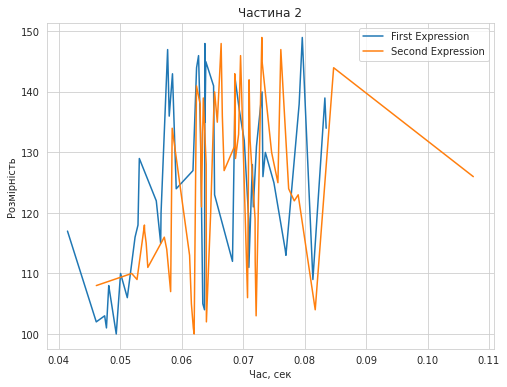

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=xs1, y=ys, label="First Expression")
sns.lineplot(x=xs2, y=ys, label="Second Expression")
plt.xlabel("Час, сек")
plt.ylabel("Розмірність")
plt.title("Частина 2")
plt.show()

In [20]:
with open(results_file_path, "a") as f:
    json.dump({"second_part": {"vectors_B": vectors_B, "vectors_S": vectors_S}}, f)

Запис результатів у файл